# Diabetes

In [1]:
# loading the important libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# read the dataset 
pd.set_option("display.max_columns", None)

df = pd.read_csv('Group4_diabetes.csv')
print(df.shape)
df.head()

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  Pregnancies  has  17  unique values
Feature  Glucose  has  136  unique values
Feature  BloodPressure  has  47  unique values
Feature  SkinThickness  has  51  unique values
Feature  Insulin  has  186  unique values
Feature  BMI  has  248  unique values
Feature  DiabetesPedigreeFunction  has  517  unique values
Feature  Age  has  52  unique values
Feature  Outcome  has  2  unique values ---->  [1 0]


# Data Pre-processing Phase

# EDA 

In [6]:
## checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# remove duplicate entries, if any
df.drop_duplicates(inplace = True)
print(df.shape)

(768, 9)


In [8]:
for colum in df.columns:
    
        print("Feature ", colum)
    
        print("value count ", df[colum].value_counts())

Feature  Pregnancies
value count  1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
Feature  Glucose
value count  99     17
100    17
129    14
125    14
106    14
       ..
169     1
61      1
178     1
177     1
199     1
Name: Glucose, Length: 136, dtype: int64
Feature  BloodPressure
value count  70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
82     30
66     30
88     25
84     23
90     22
58     21
86     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
96      4
44      4
110     3
106     3
100     3
98      3
108     2
104     2
46      2
55      2
30      2
95      1
61      1
102     1
38      1
40      1
24      1
114     1
122     1
Name: BloodPressure, dtype: int64
Feature  SkinThickness
value count  0     2

Feature  Pregnancies


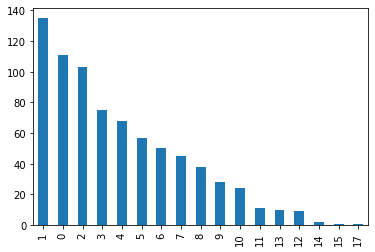

Feature  Outcome


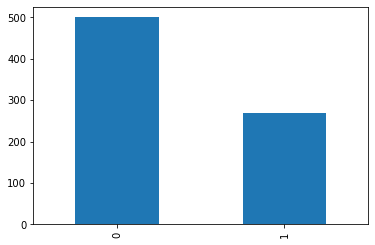

In [9]:
for colm in df.columns:
       if len(df[colm].unique()) <= 30:
            
          print("Feature ", colm)
          df[colm].value_counts().plot(kind="bar")
          plt.show()

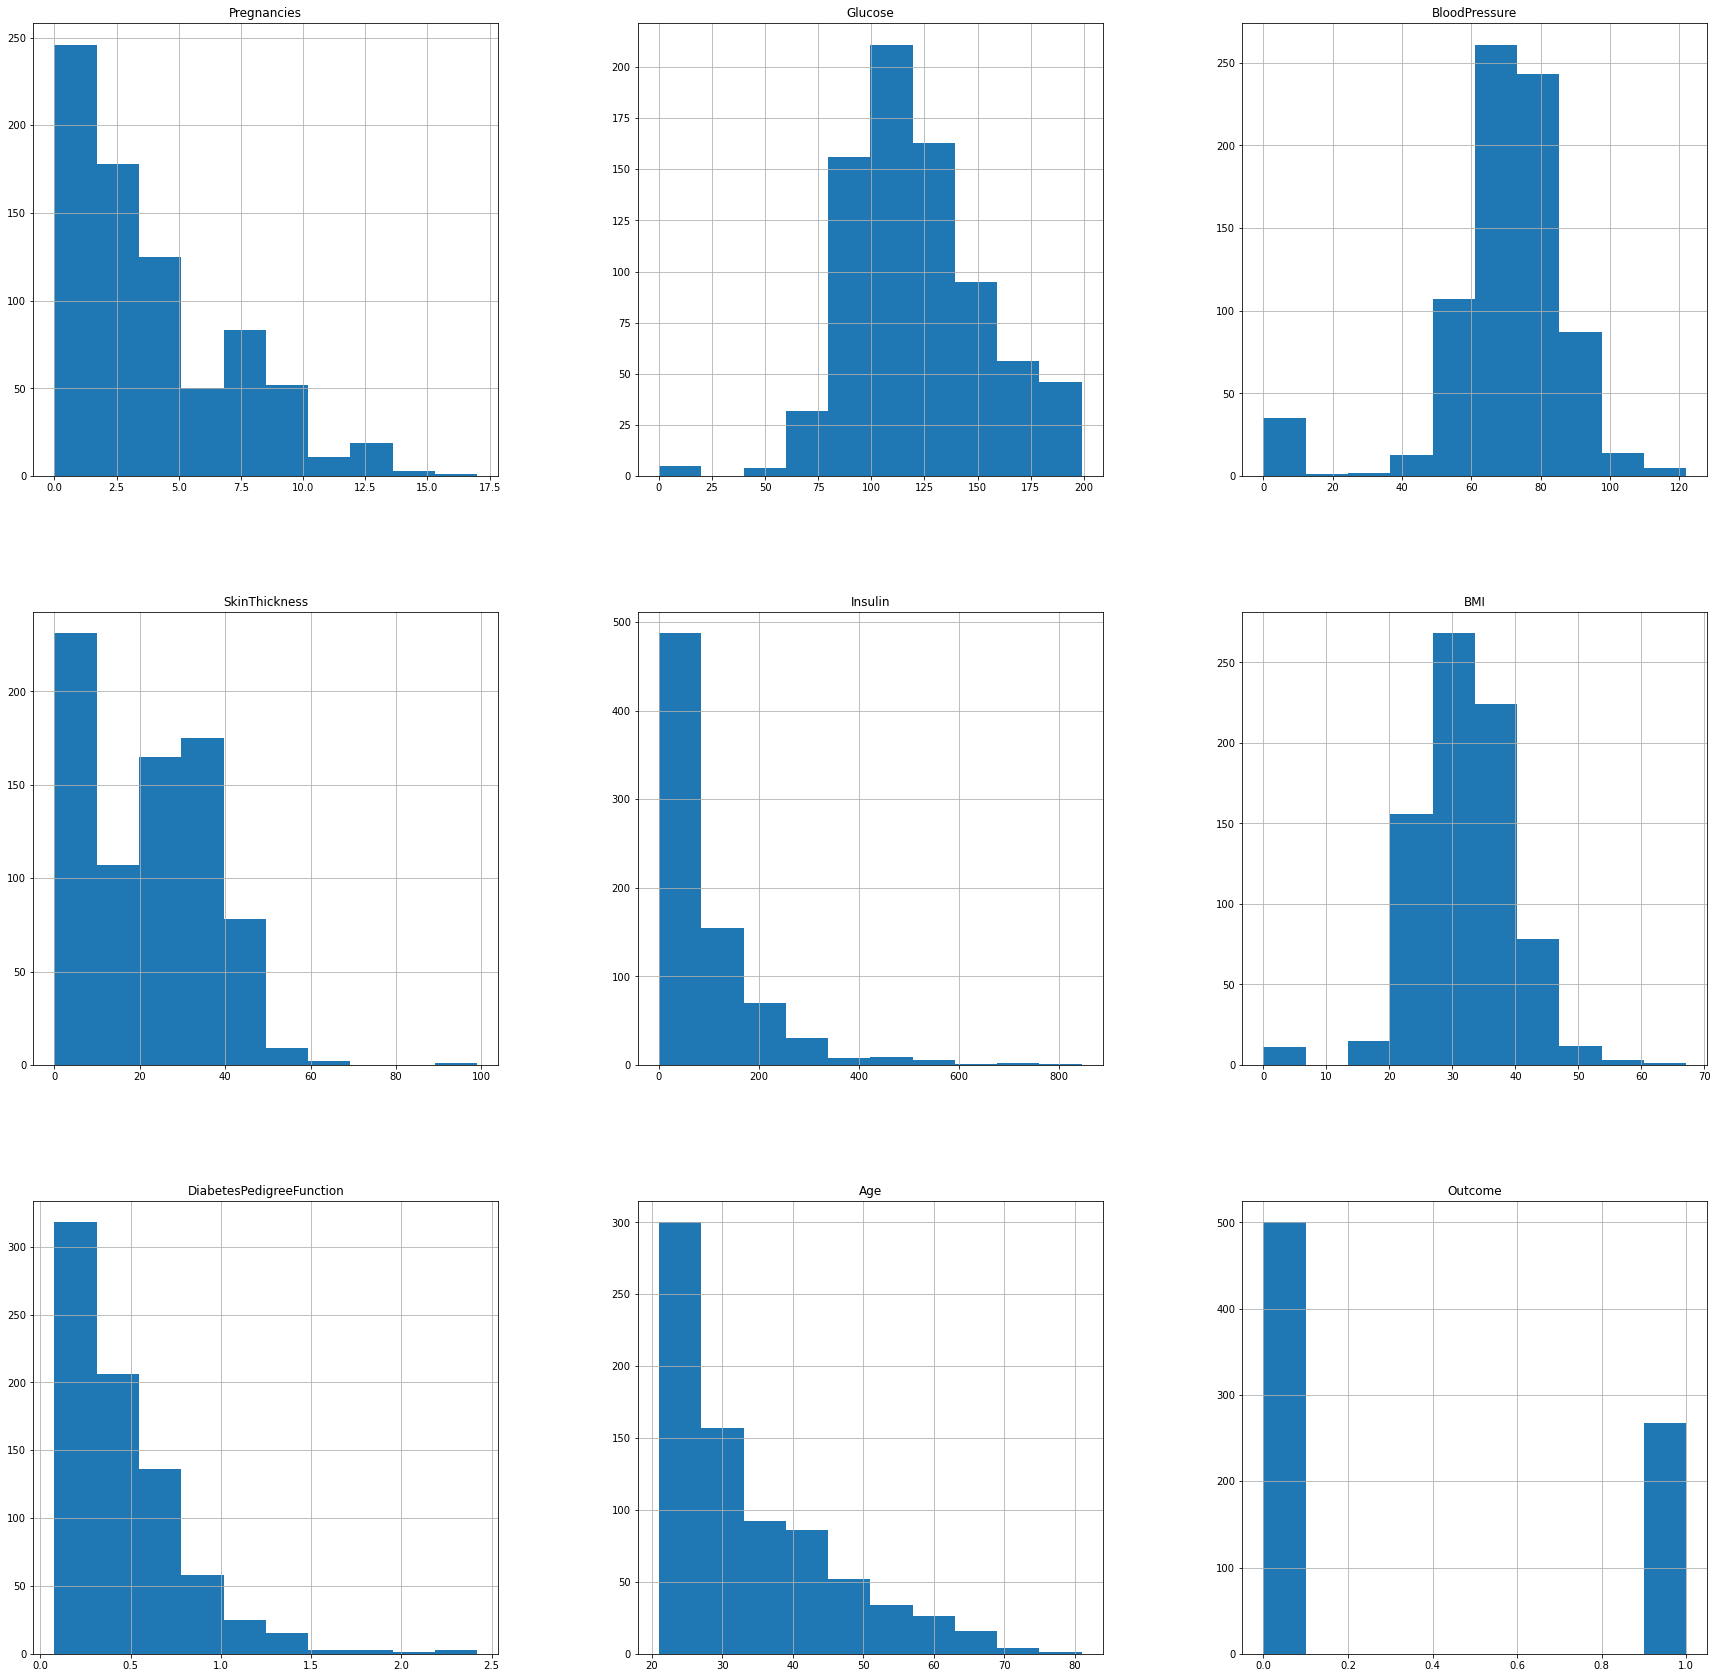

In [10]:
df.hist(figsize=(30,30))
plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

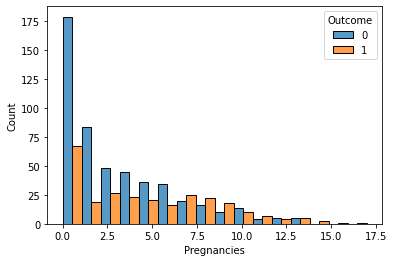

In [11]:
sns.histplot(x = 'Pregnancies', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#pregnencies over 6 times have higher risk of having diabetes

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

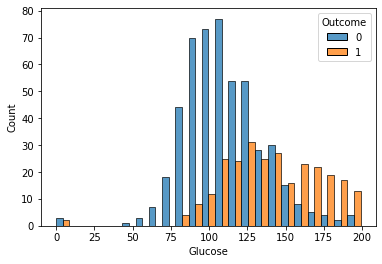

In [12]:
sns.histplot(x = 'Glucose', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#glucose over 150 have higher risk of having diabetes

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

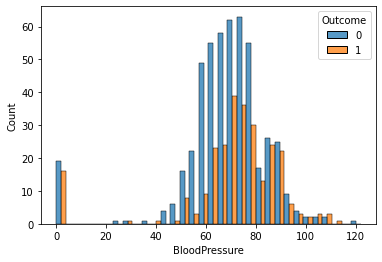

In [13]:
sns.histplot(x = 'BloodPressure', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#BloodPressure over 100 have higher risk of having diabetes

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

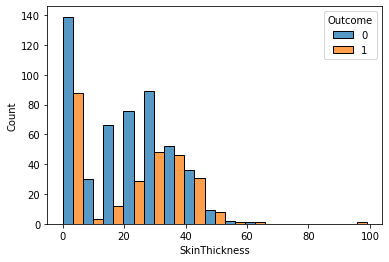

In [15]:
sns.histplot(x = 'SkinThickness', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#feature skin thickness has no variation in 2 categories

<AxesSubplot:xlabel='Insulin', ylabel='Count'>

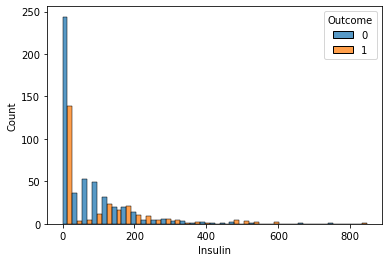

In [16]:
sns.histplot(x = 'Insulin', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#Insulin over 500 have higher risk of having diabetes

<AxesSubplot:xlabel='BMI', ylabel='Count'>

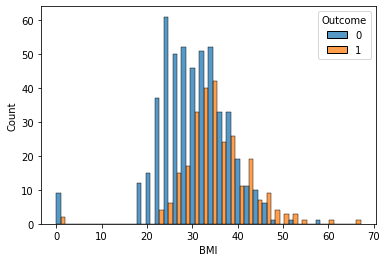

In [17]:
sns.histplot(x = 'BMI', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#BMI over 45 have higher risk of having diabetes

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Count'>

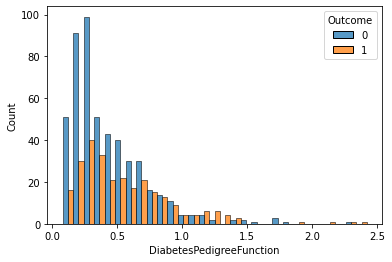

In [18]:
sns.histplot(x = 'DiabetesPedigreeFunction', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#DiabetesPedigreeFunction over 1 have higher risk of having diabetes

<AxesSubplot:xlabel='Age', ylabel='Count'>

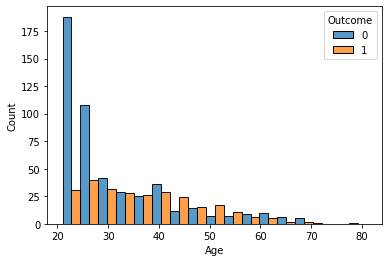

In [19]:
sns.histplot(x = 'Age', data = df, hue = 'Outcome',multiple = 'dodge')

In [ ]:
#Age over 45 have higher risk of having diabetes

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

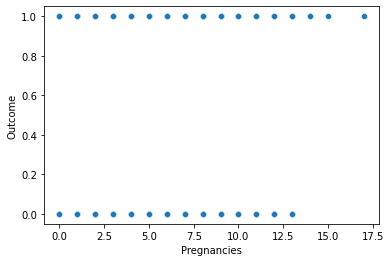

In [20]:
sns.scatterplot(df['Pregnancies'],df['Outcome'])

In [ ]:
#Feature pregnancies have equal representation

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

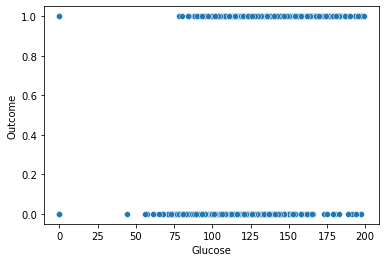

In [21]:
sns.scatterplot(df['Glucose'],df['Outcome'])

In [ ]:
#in feature glucose,values before 80 have less chance of having diabetes 

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome'>

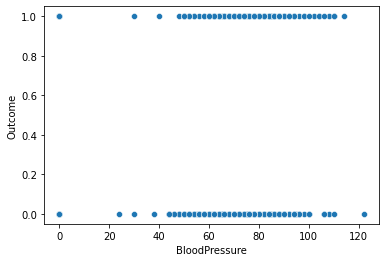

In [22]:
sns.scatterplot(df['BloodPressure'],df['Outcome'])

In [ ]:
#in feature BloodPressure,values before 50 have less chance of having diabetes

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome'>

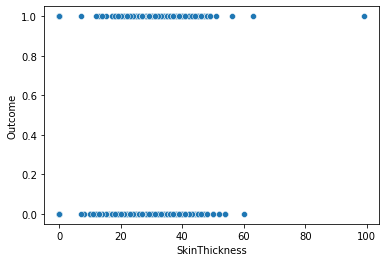

In [23]:
sns.scatterplot(df['SkinThickness'],df['Outcome'])

In [ ]:
#in feature SkinThickness,values in the range between 10 to 50 have more chance of having diabetes

<AxesSubplot:xlabel='Insulin', ylabel='Outcome'>

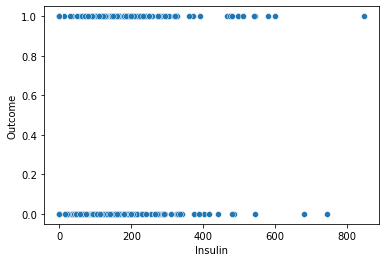

In [24]:
sns.scatterplot(df['Insulin'],df['Outcome'])

In [ ]:
#in feature Insulin,values after 600 have less chance of having diabetes

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

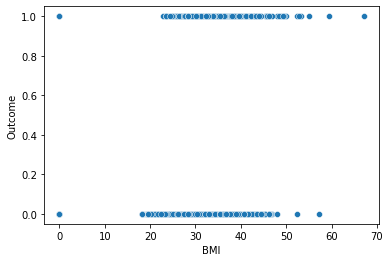

In [25]:
sns.scatterplot(df['BMI'],df['Outcome'])

In [ ]:
#in feature BMI,values in the range between 23 to 50 have less chance of having diabetes

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

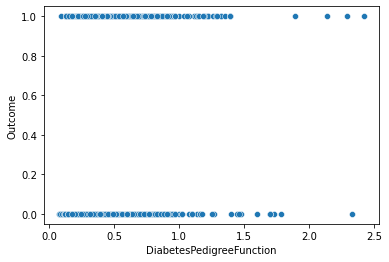

In [26]:
sns.scatterplot(df['DiabetesPedigreeFunction'],df['Outcome'])

In [ ]:
#in feature DiabetesPedigreeFunction,values after 1.5 have less chance of having diabetes

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

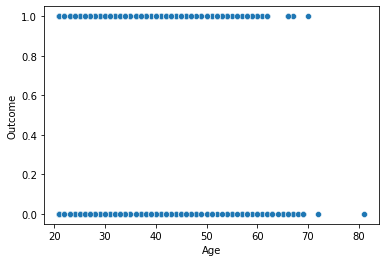

In [27]:
sns.scatterplot(df['Age'],df['Outcome'])

In [ ]:
#in feature Age,values after 65 have less chance of having diabetes

#Checking outliers

In [28]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

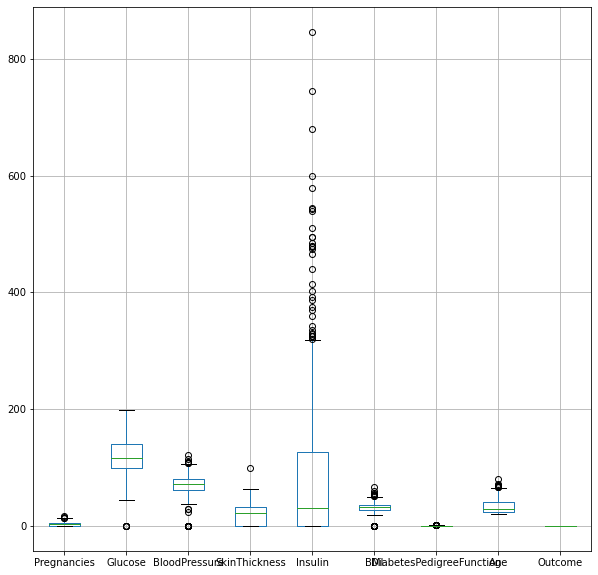

In [29]:
df.boxplot(figsize=(10,10))
plt.show()

In [30]:
# implementation of the Tukey's algorithm
def findOutliers(dataset):
    outliers = []
    Q2 = dataset.median()
    Q1 = dataset.describe()[4]
    Q3 = dataset.describe()[6]
    IQR = Q3 - Q1
    lf = Q1 - 1.5*IQR # lf = lower fence
    uf = Q3 + 1.5*IQR # Uf = Upper fence
    for x in dataset:
        if x < lf or x > uf:
            outliers.append(x)
    return outliers

In [31]:
findOutliers(df['Age'])

[69, 67, 72, 81, 67, 67, 70, 68, 69]

<AxesSubplot:xlabel='Age'>

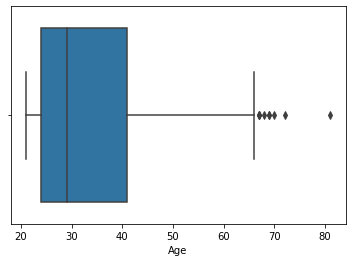

In [32]:
sns.boxplot(x = 'Age', data = df)

In [33]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))

<AxesSubplot:xlabel='Age'>

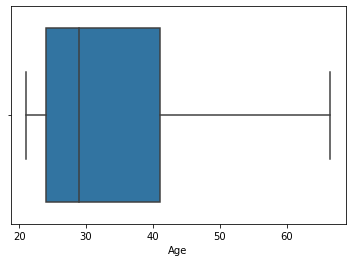

In [34]:
sns.boxplot(x = 'Age', data = df)

In [35]:
findOutliers(df['Pregnancies'])

[15, 17, 14, 14]

<AxesSubplot:xlabel='Pregnancies'>

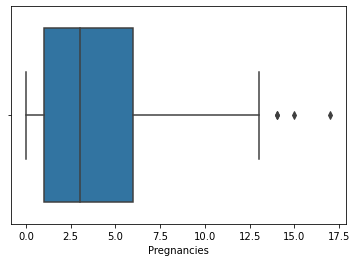

In [36]:
sns.boxplot(x = 'Pregnancies', data = df)

In [37]:
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Pregnancies']=np.where(df['Pregnancies']>upper_whisker,upper_whisker,np.where(df['Pregnancies']<lower_whisker,
                                                                                  lower_whisker,df['Pregnancies']))

<AxesSubplot:xlabel='Pregnancies'>

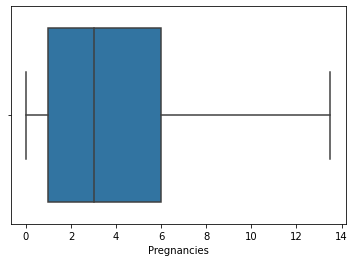

In [38]:
sns.boxplot(x = 'Pregnancies', data = df)

In [39]:
findOutliers(df['Glucose'])

[0, 0, 0, 0, 0]

<AxesSubplot:xlabel='Glucose'>

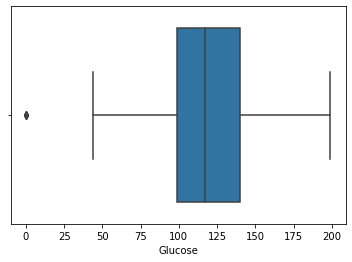

In [40]:
sns.boxplot(x = 'Glucose', data = df)

In [41]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Glucose']=np.where(df['Glucose']>upper_whisker,upper_whisker,np.where(df['Glucose']<lower_whisker,
                                                                          lower_whisker,df['Glucose']))

<AxesSubplot:xlabel='Glucose'>

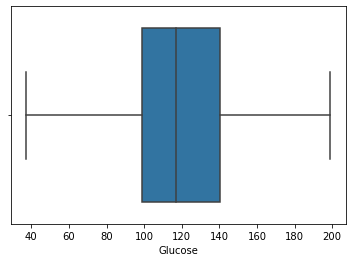

In [42]:
sns.boxplot(x = 'Glucose', data = df)

In [43]:
findOutliers(df['BloodPressure'])

[0,
 0,
 30,
 110,
 0,
 0,
 0,
 0,
 108,
 122,
 30,
 0,
 110,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 108,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 110,
 0,
 24,
 0,
 0,
 0,
 0,
 114,
 0,
 0,
 0]

<AxesSubplot:xlabel='BloodPressure'>

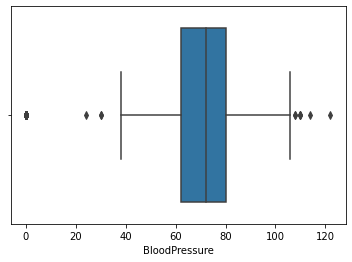

In [44]:
sns.boxplot(x = 'BloodPressure', data = df)

In [45]:
Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['BloodPressure']=np.where(df['BloodPressure']>upper_whisker,upper_whisker,np.where(df['BloodPressure']<lower_whisker,
                                                                                      lower_whisker,df['BloodPressure']))

<AxesSubplot:xlabel='BloodPressure'>

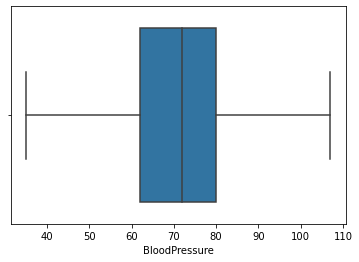

In [46]:
sns.boxplot(x = 'BloodPressure', data = df)

In [47]:
findOutliers(df['SkinThickness'])

[99]

<AxesSubplot:xlabel='SkinThickness'>

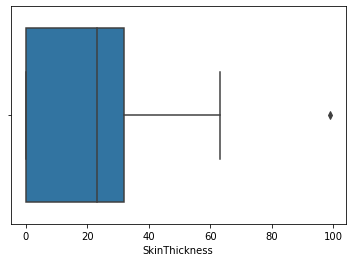

In [48]:
sns.boxplot(x = 'SkinThickness', data = df)

In [49]:
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['SkinThickness']=np.where(df['SkinThickness']>upper_whisker,upper_whisker,np.where(df['SkinThickness']<lower_whisker,
                                                                                      lower_whisker,df['SkinThickness']))

<AxesSubplot:xlabel='SkinThickness'>

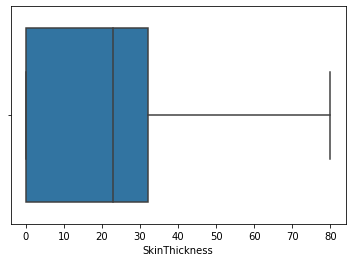

In [50]:
sns.boxplot(x = 'SkinThickness', data = df)

In [51]:
findOutliers(df['Insulin'])

[543,
 846,
 342,
 495,
 325,
 485,
 495,
 478,
 744,
 370,
 680,
 402,
 375,
 545,
 360,
 325,
 465,
 325,
 415,
 579,
 474,
 328,
 480,
 326,
 330,
 600,
 321,
 440,
 540,
 480,
 335,
 387,
 392,
 510]

<AxesSubplot:xlabel='Insulin'>

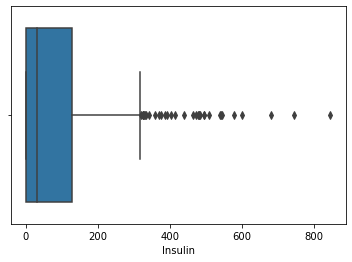

In [52]:
sns.boxplot(x = 'Insulin', data = df)

In [53]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['Insulin']=np.where(df['Insulin']>upper_whisker,upper_whisker,np.where(df['Insulin']<lower_whisker,lower_whisker,
                                                                          df['Insulin']))

<AxesSubplot:xlabel='Insulin'>

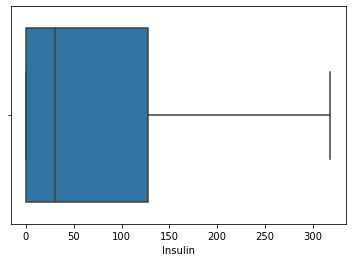

In [54]:
sns.boxplot(x = 'Insulin', data = df)

In [55]:
findOutliers(df['BMI'])

[0.0,
 0.0,
 0.0,
 0.0,
 53.2,
 55.0,
 0.0,
 67.1,
 52.3,
 52.3,
 52.9,
 0.0,
 0.0,
 59.4,
 0.0,
 0.0,
 57.3,
 0.0,
 0.0]

<AxesSubplot:xlabel='BMI'>

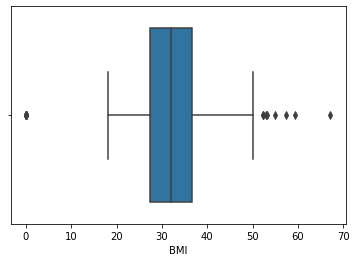

In [56]:
sns.boxplot(x = 'BMI', data = df)

In [57]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['BMI']=np.where(df['BMI']>upper_whisker,upper_whisker,np.where(df['BMI']<lower_whisker,lower_whisker,df['BMI']))

<AxesSubplot:xlabel='BMI'>

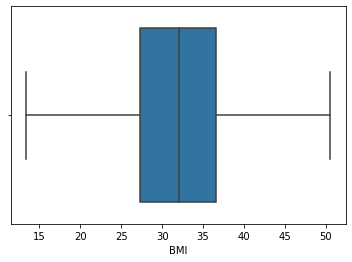

In [58]:
sns.boxplot(x = 'BMI', data = df)

In [59]:
findOutliers(df['DiabetesPedigreeFunction'])

[2.288,
 1.441,
 1.39,
 1.893,
 1.781,
 1.222,
 1.4,
 1.321,
 1.224,
 2.329,
 1.318,
 1.213,
 1.353,
 1.224,
 1.391,
 1.476,
 2.137,
 1.731,
 1.268,
 1.6,
 2.42,
 1.251,
 1.699,
 1.258,
 1.282,
 1.698,
 1.461,
 1.292,
 1.394]

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

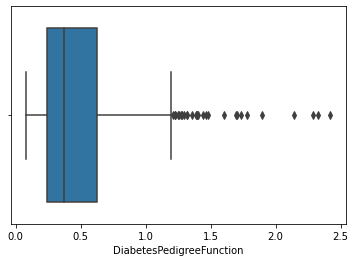

In [60]:
sns.boxplot(x = 'DiabetesPedigreeFunction', data = df)

In [61]:
Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction']>upper_whisker,upper_whisker,
                                        np.where(df['DiabetesPedigreeFunction']<lower_whisker,
                                                 lower_whisker,df['DiabetesPedigreeFunction']))

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

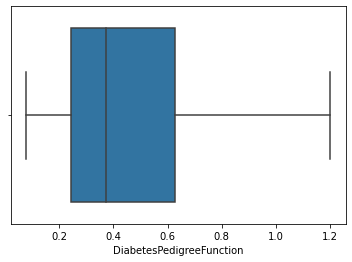

In [62]:
sns.boxplot(x = 'DiabetesPedigreeFunction', data = df)

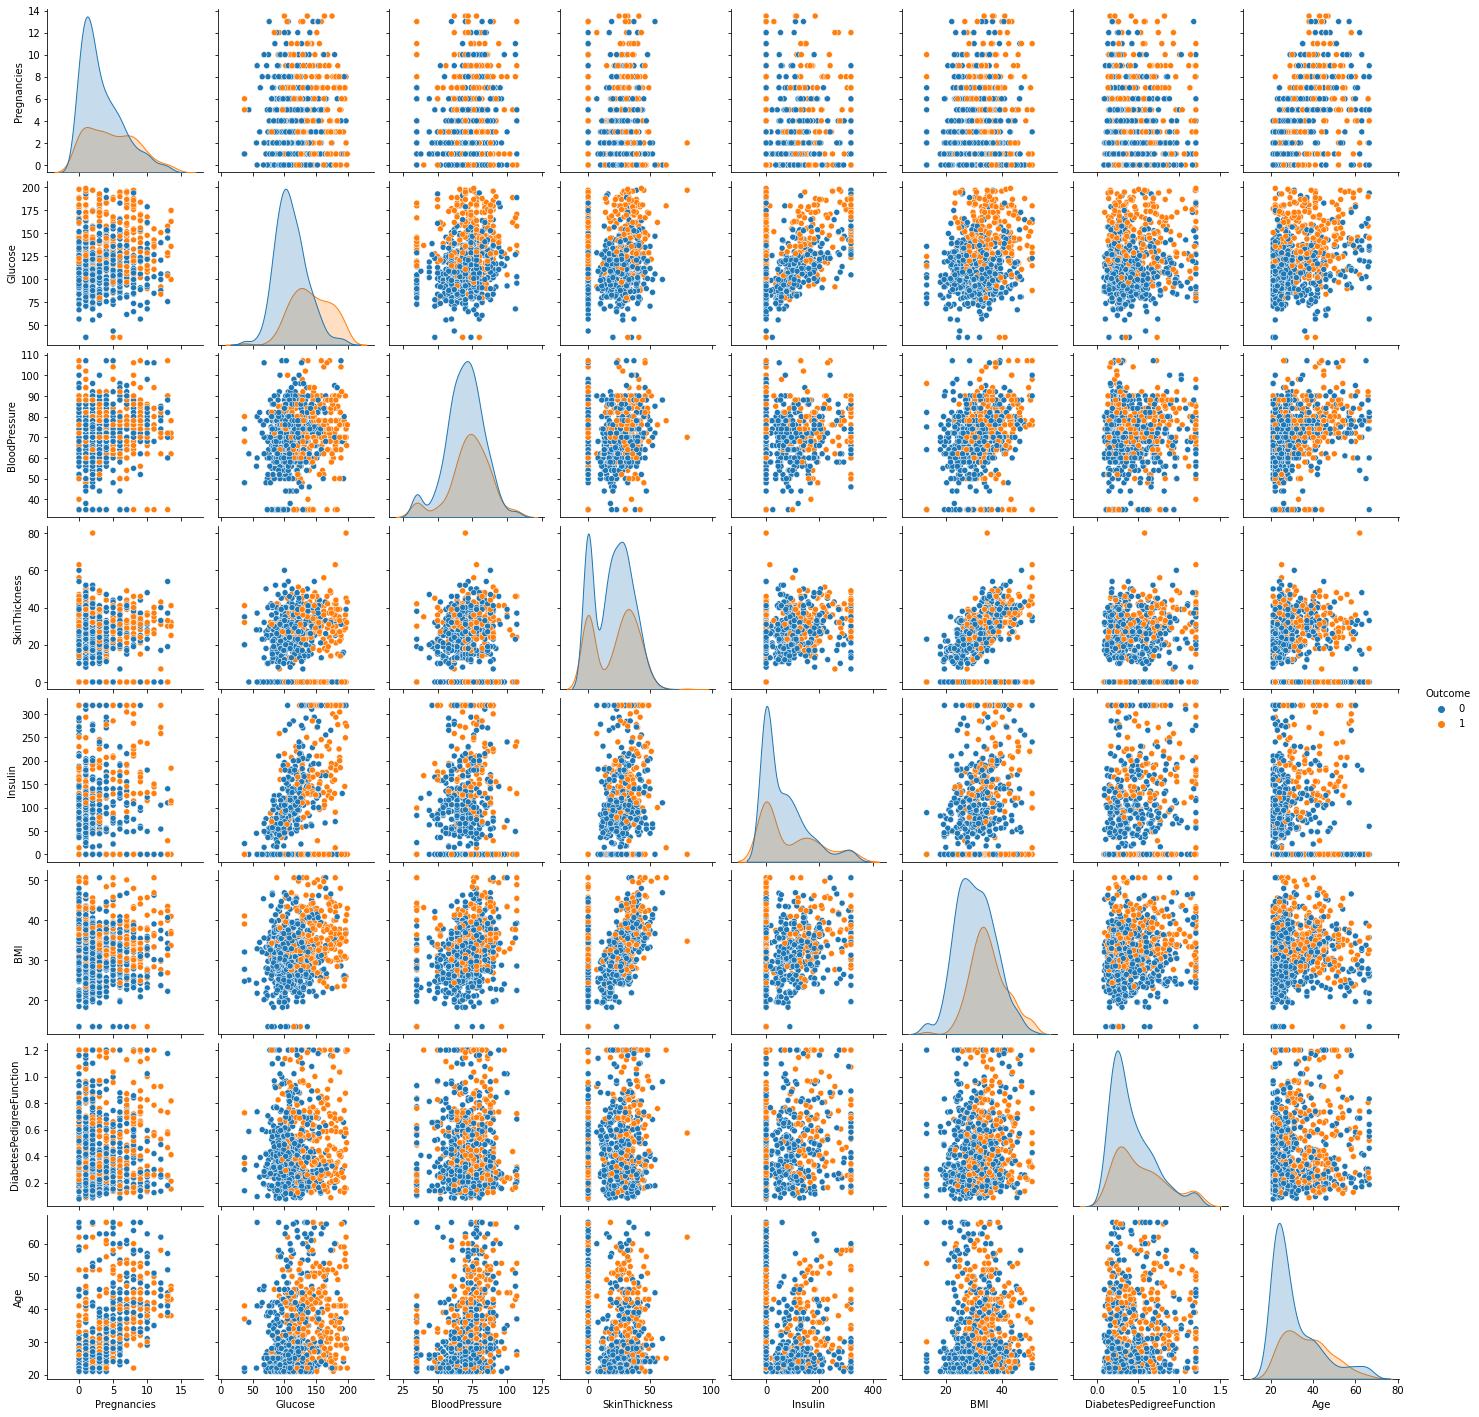

In [63]:
sns.pairplot(df,hue='Outcome')

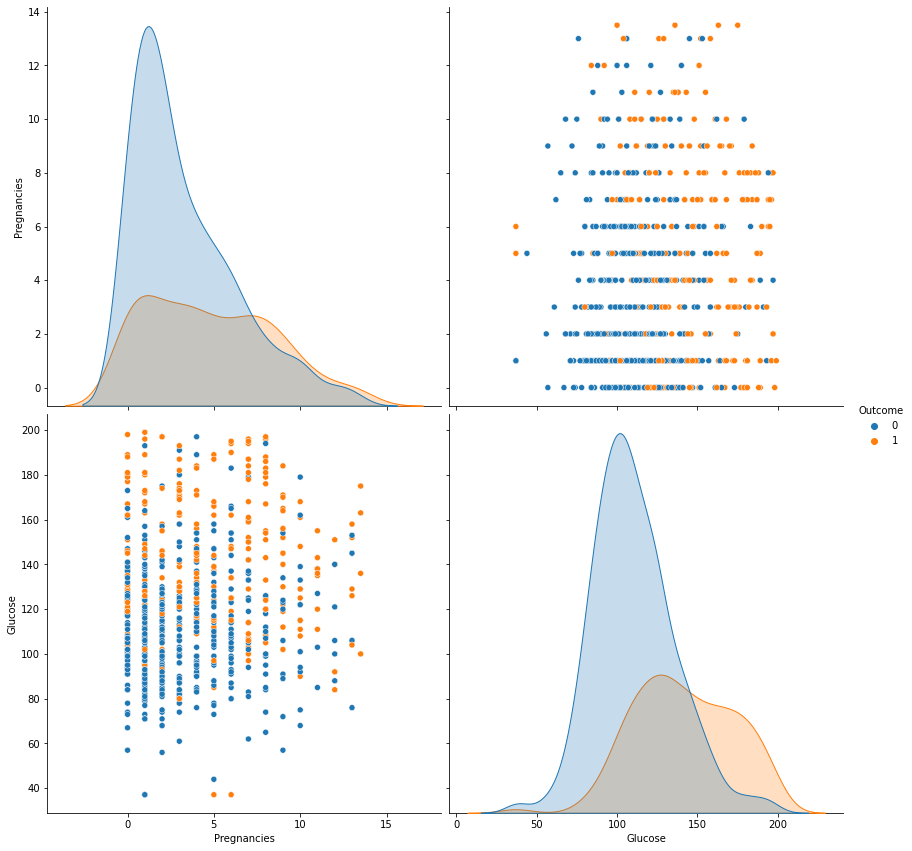

In [64]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'Glucose'], height=6, aspect=1 )

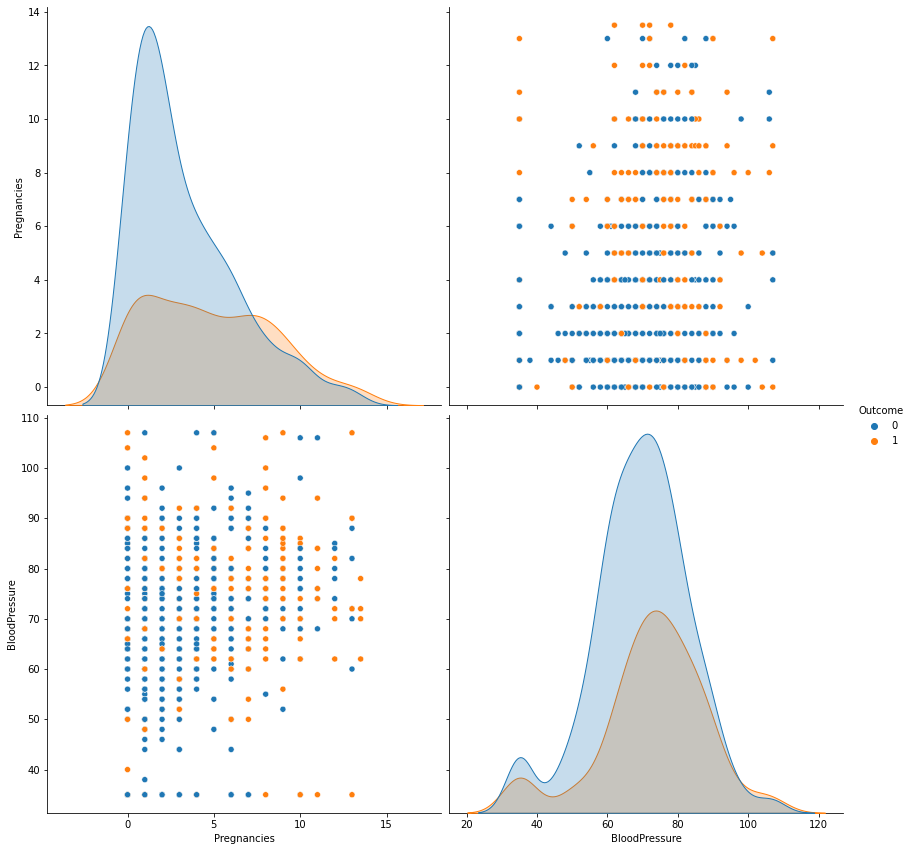

In [65]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'BloodPressure'], height=6, aspect=1 )

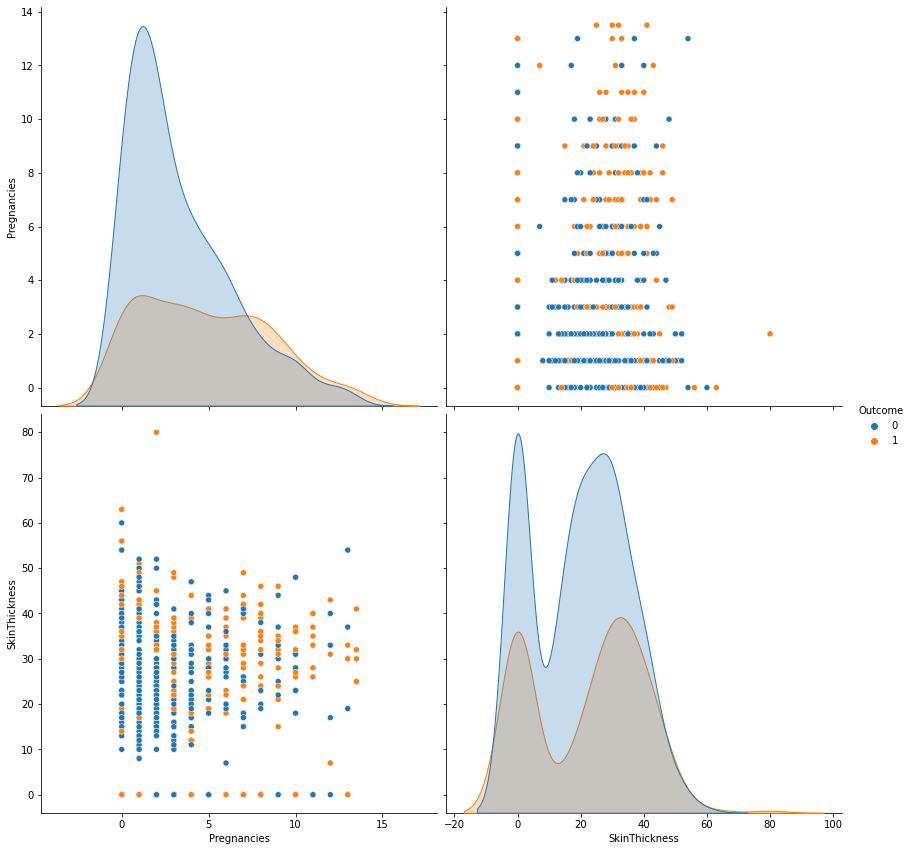

In [66]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'SkinThickness'], height=6, aspect=1 )

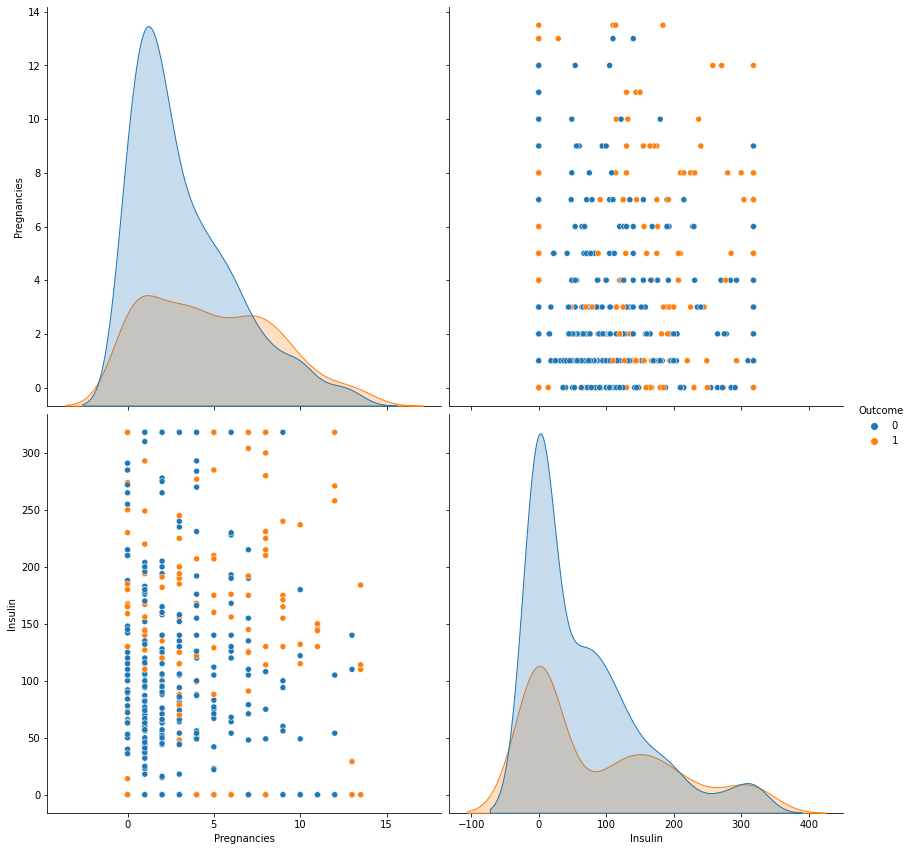

In [67]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'Insulin'], height=6, aspect=1 )

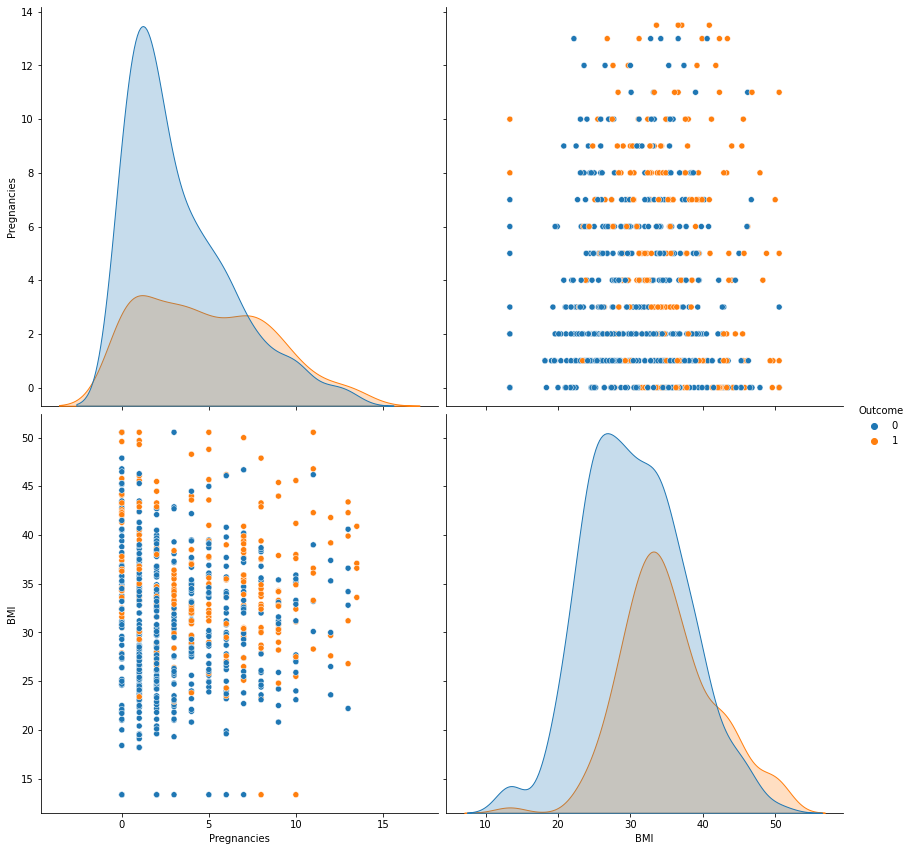

In [68]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'BMI'], height=6, aspect=1 )

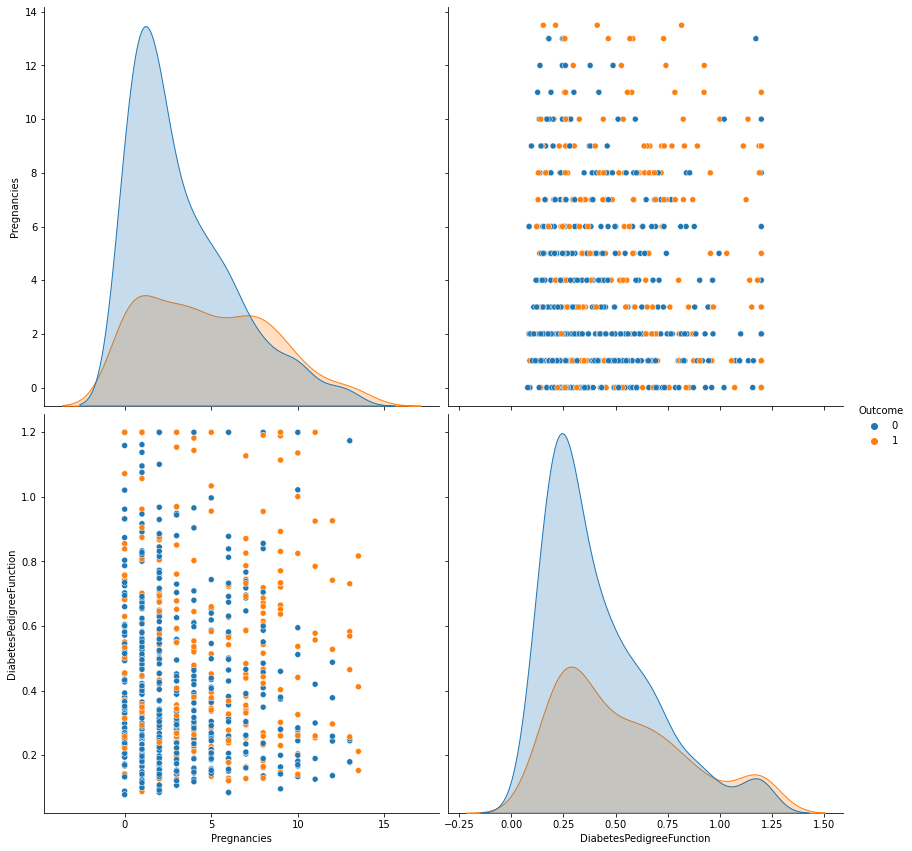

In [69]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

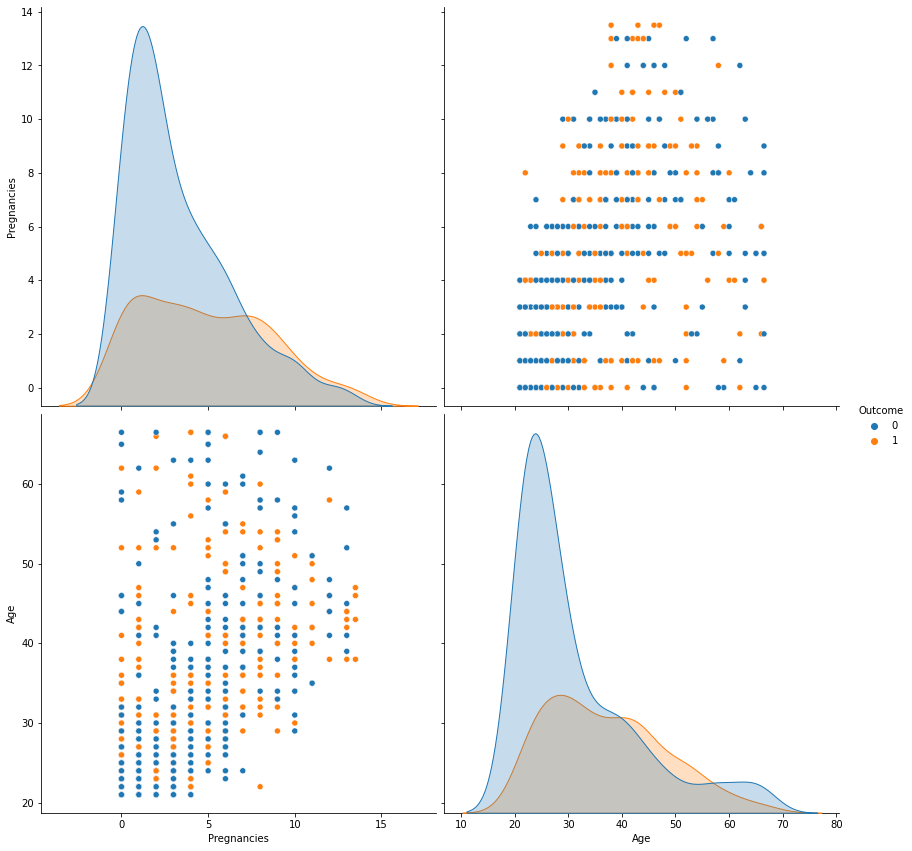

In [70]:
sns.pairplot(df, hue ='Outcome', vars=['Pregnancies', 'Age'], height=6, aspect=1 )

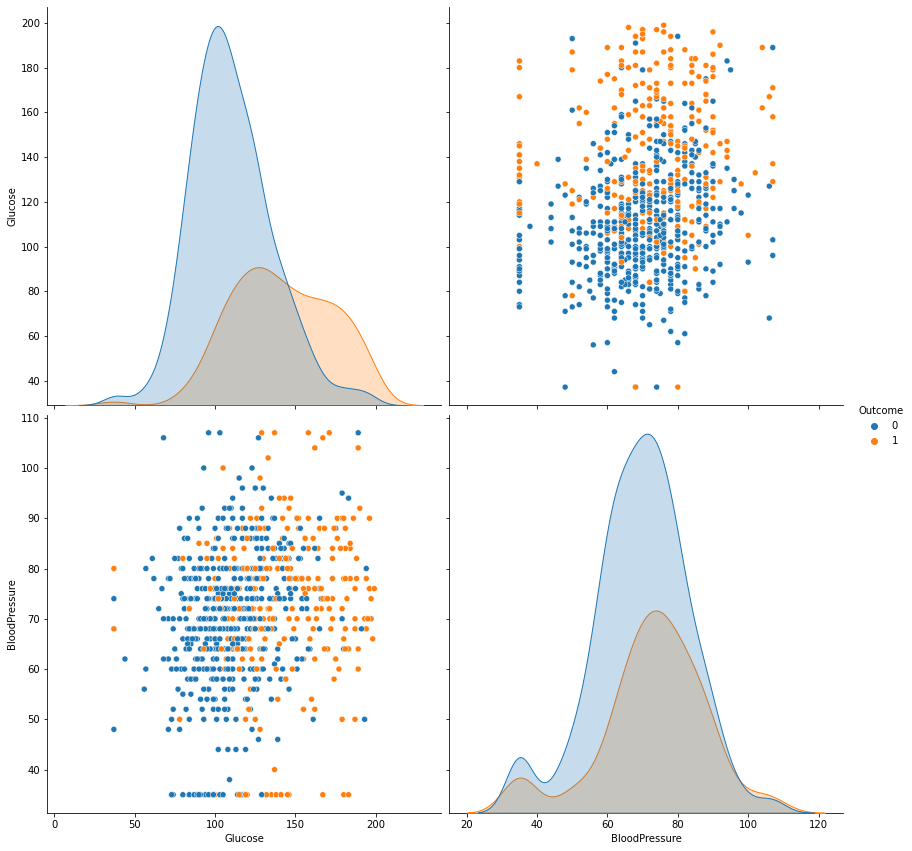

In [71]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'BloodPressure'], height=6, aspect=1 )

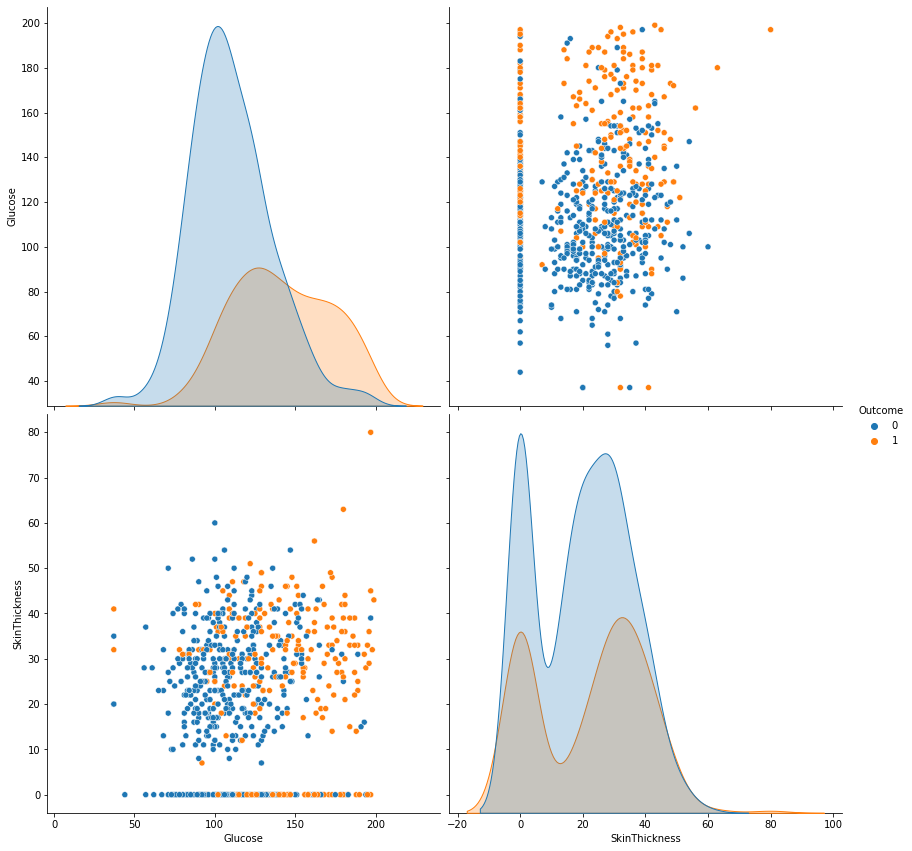

In [72]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'SkinThickness'], height=6, aspect=1 )

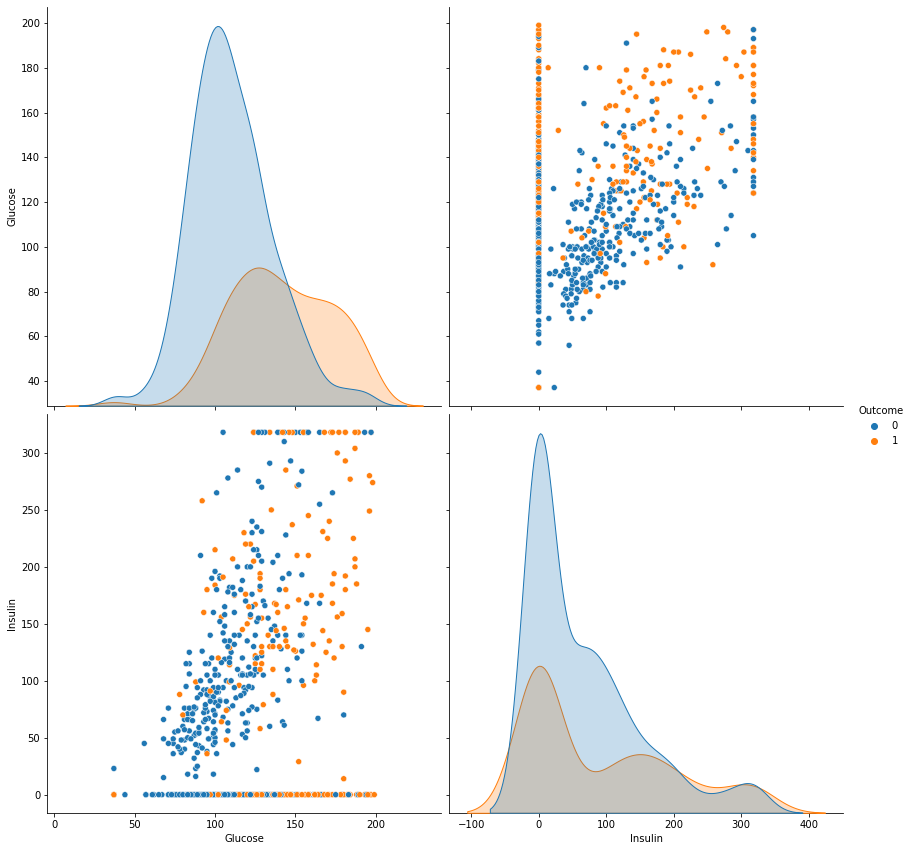

In [73]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'Insulin'], height=6, aspect=1 )

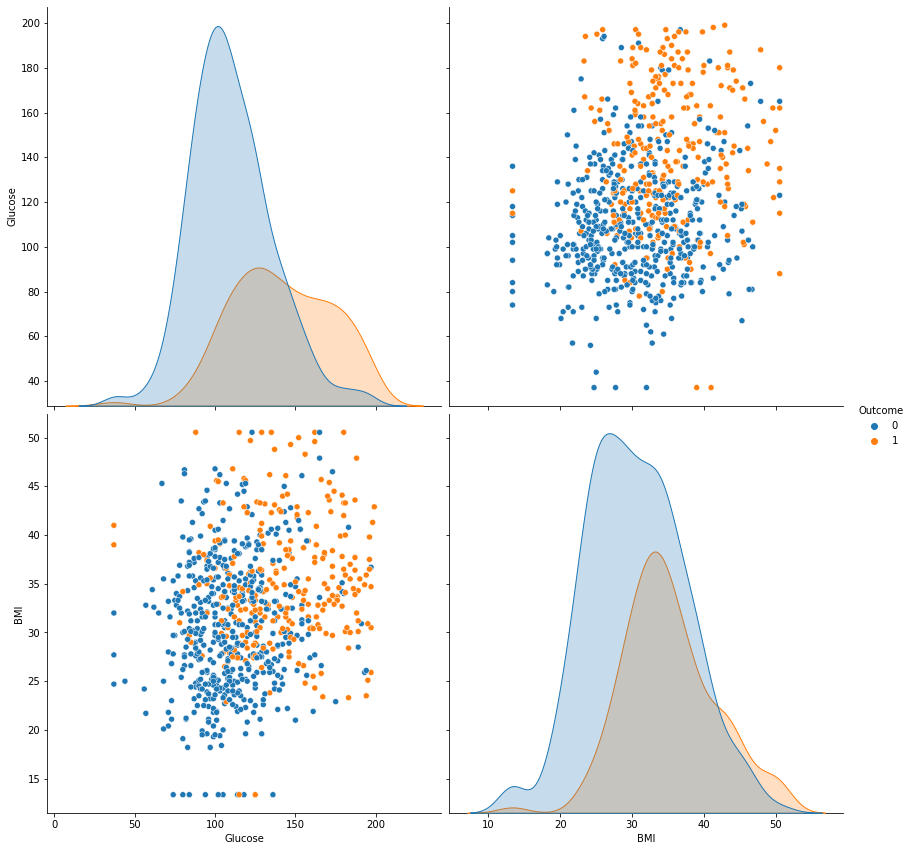

In [74]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'BMI'], height=6, aspect=1 )

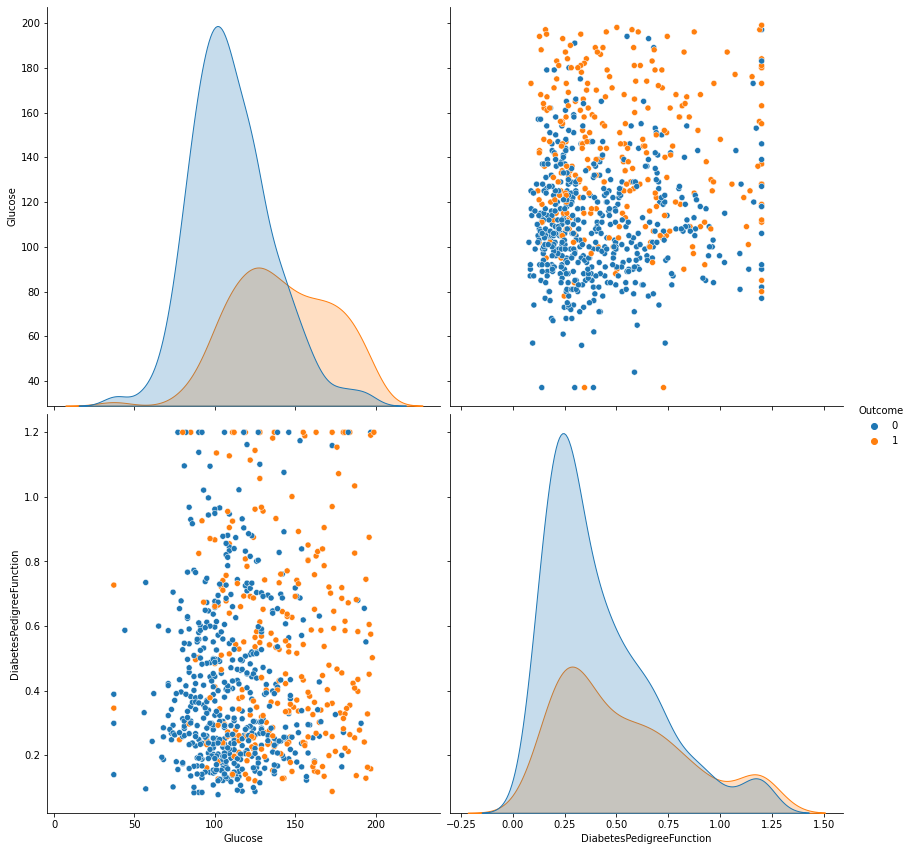

In [75]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

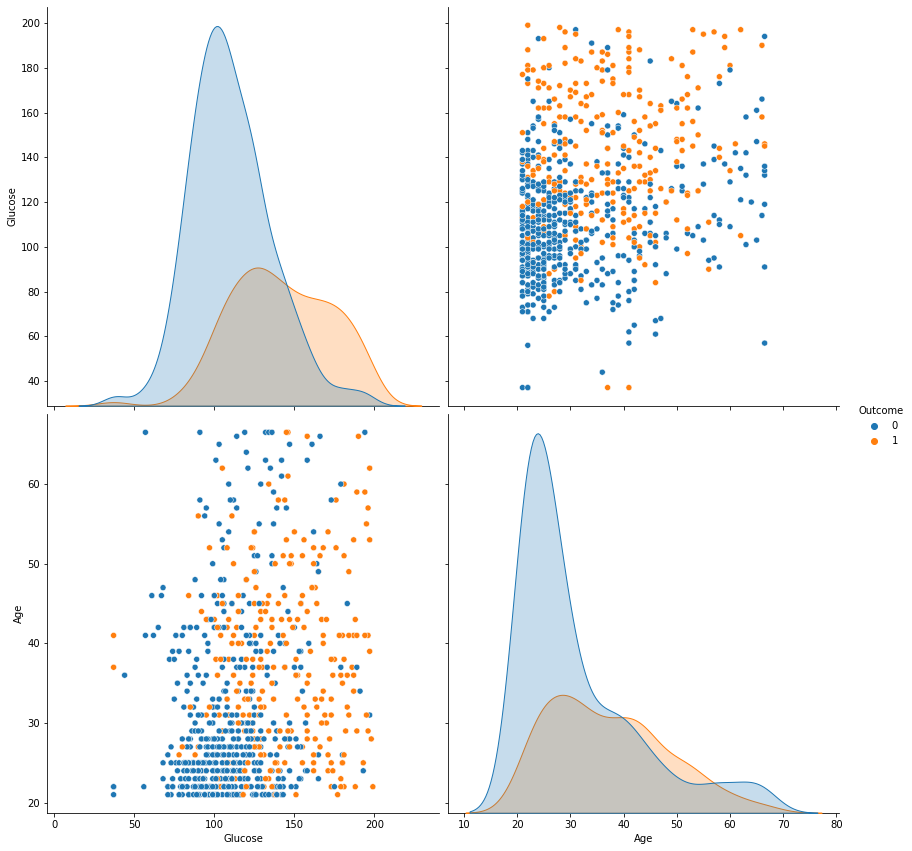

In [76]:
sns.pairplot(df, hue ='Outcome', vars=['Glucose', 'Age'], height=6, aspect=1 )

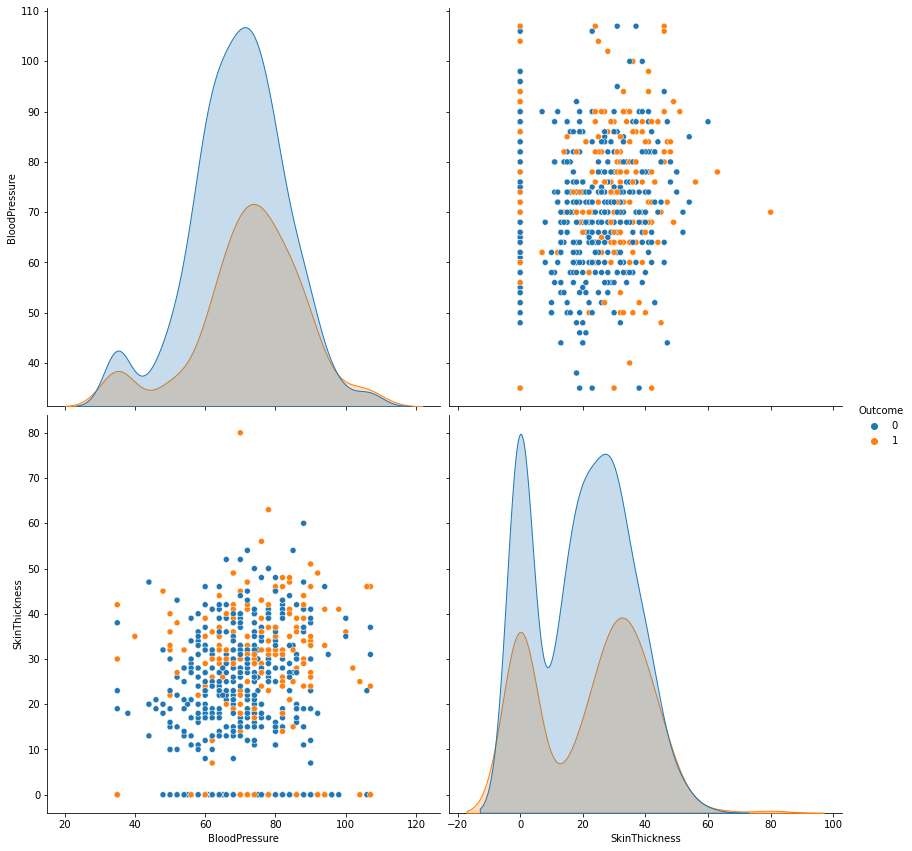

In [77]:
sns.pairplot(df, hue ='Outcome', vars=['BloodPressure', 'SkinThickness'], height=6, aspect=1 )

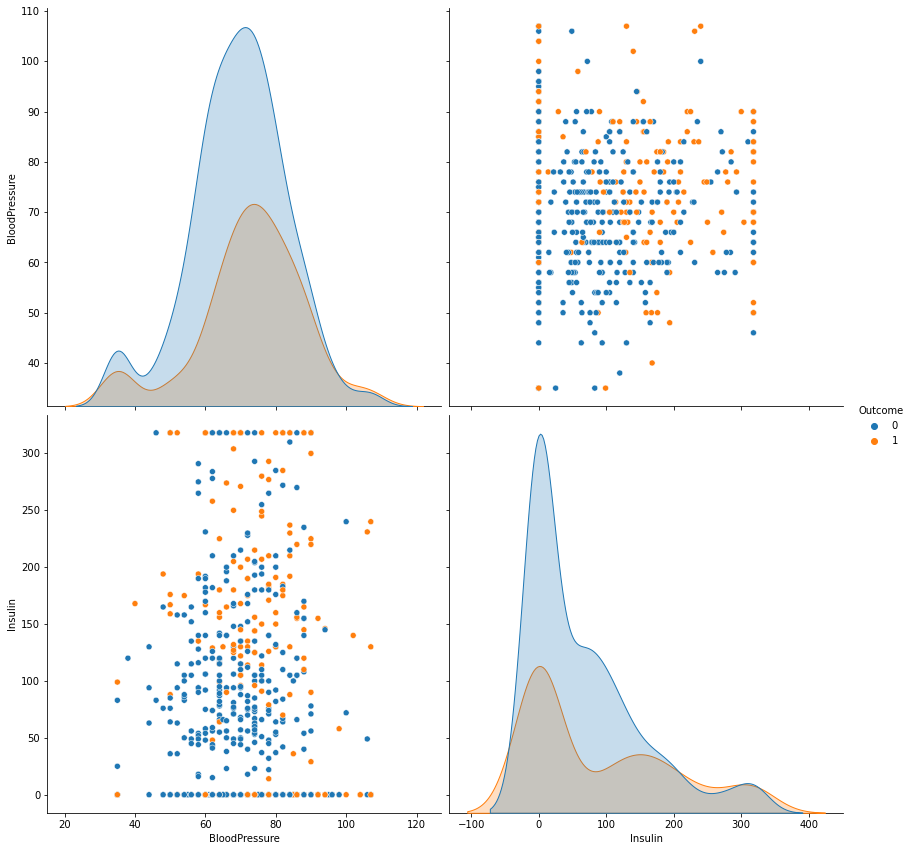

In [78]:
sns.pairplot(df, hue ='Outcome', vars=['BloodPressure', 'Insulin'], height=6, aspect=1 )

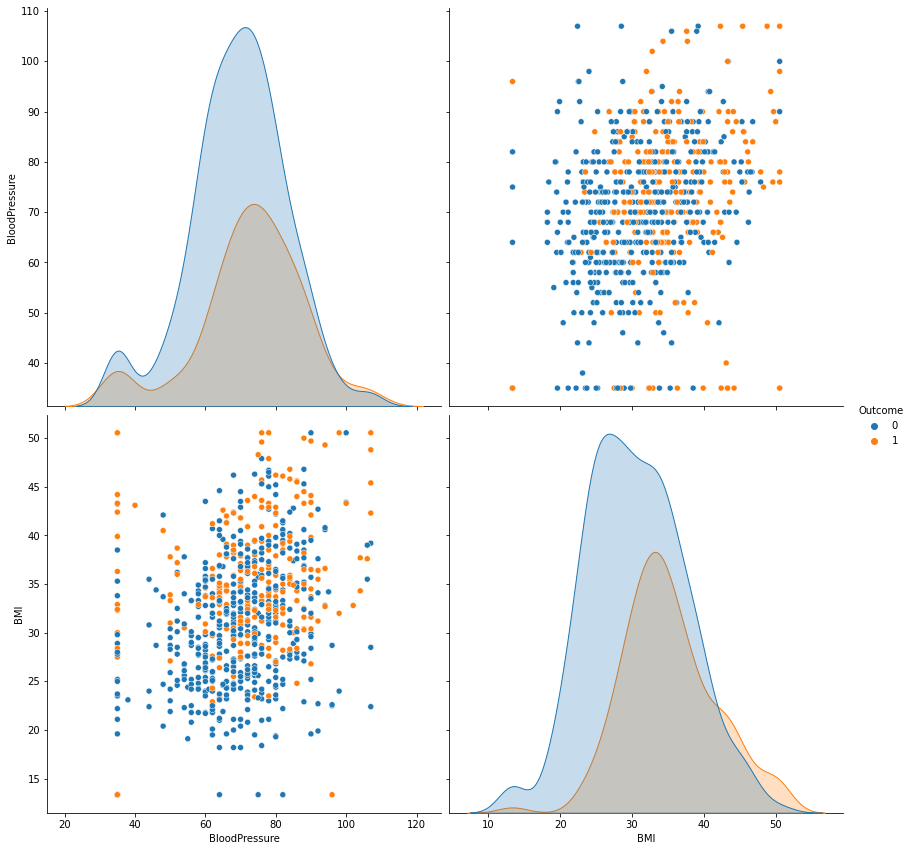

In [79]:
sns.pairplot(df, hue ='Outcome', vars=['BloodPressure', 'BMI'], height=6, aspect=1 )

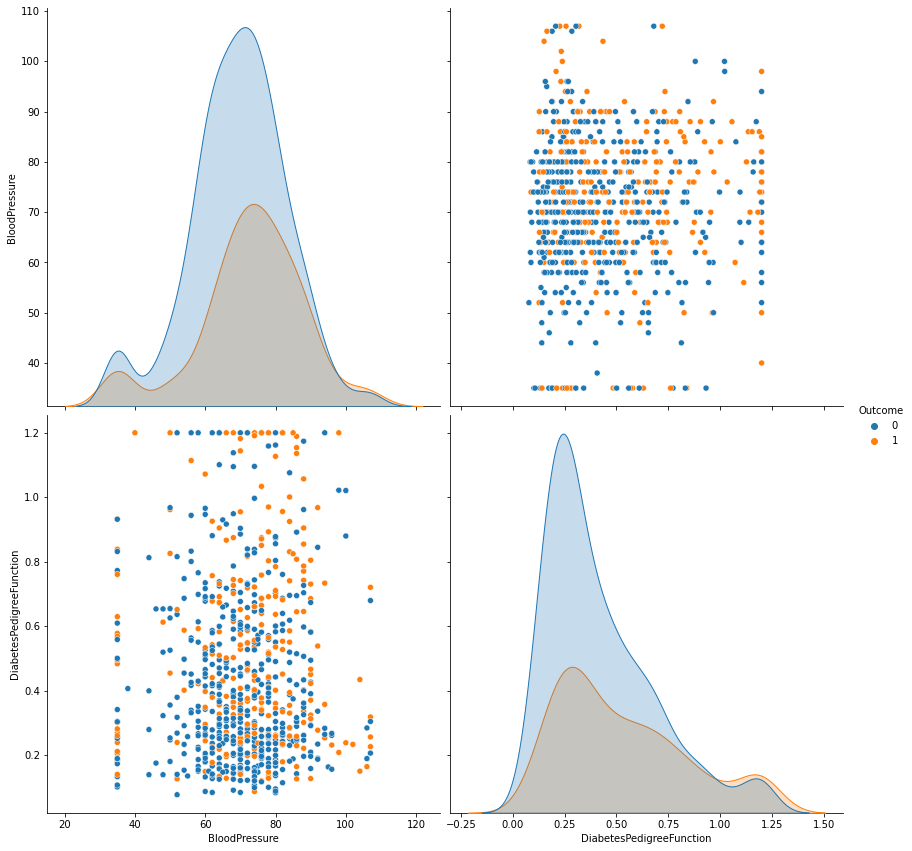

In [80]:
sns.pairplot(df, hue ='Outcome', vars=['BloodPressure', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

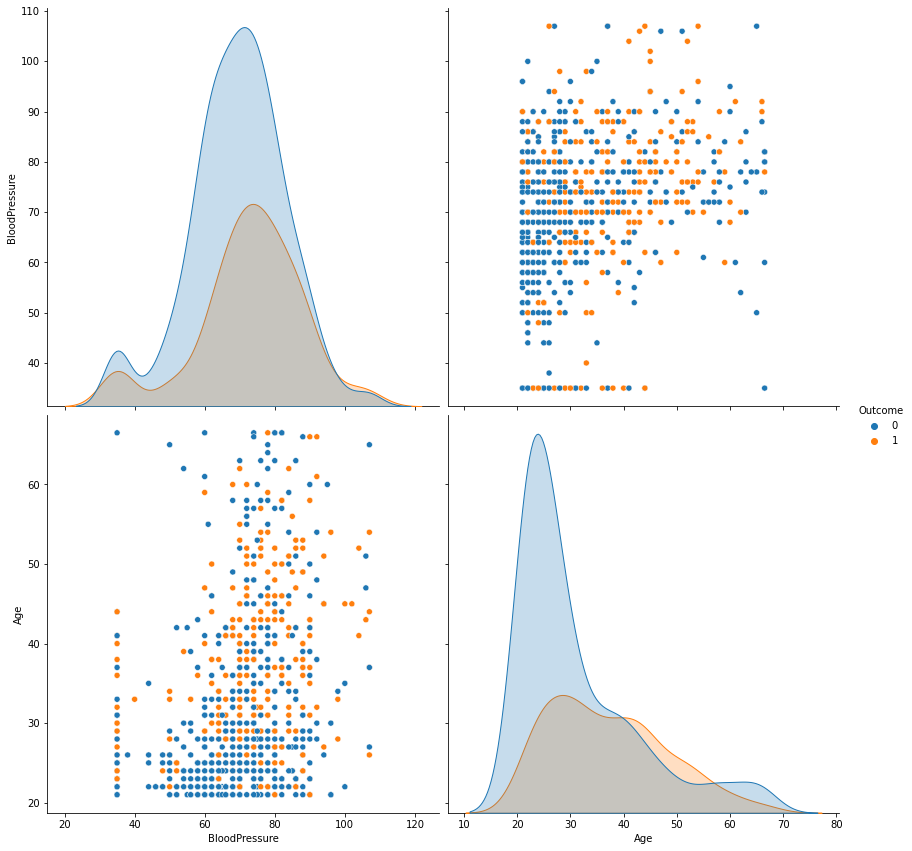

In [81]:
sns.pairplot(df, hue ='Outcome', vars=['BloodPressure', 'Age'], height=6, aspect=1 )

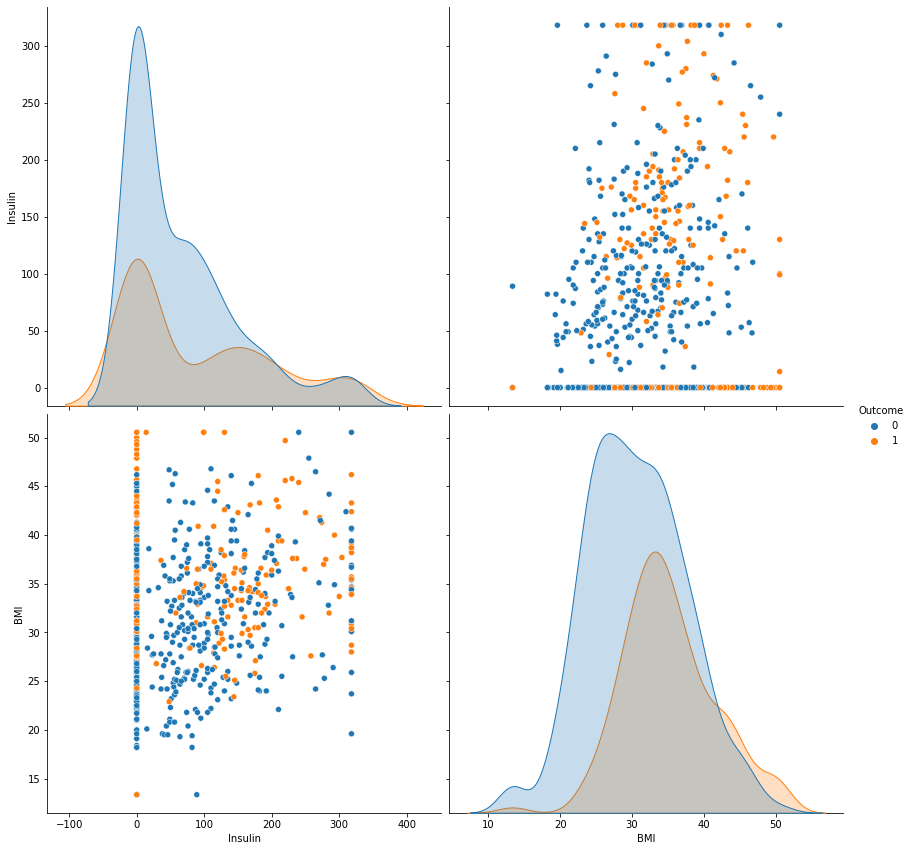

In [82]:
sns.pairplot(df, hue ='Outcome', vars=['Insulin', 'BMI'], height=6, aspect=1 )

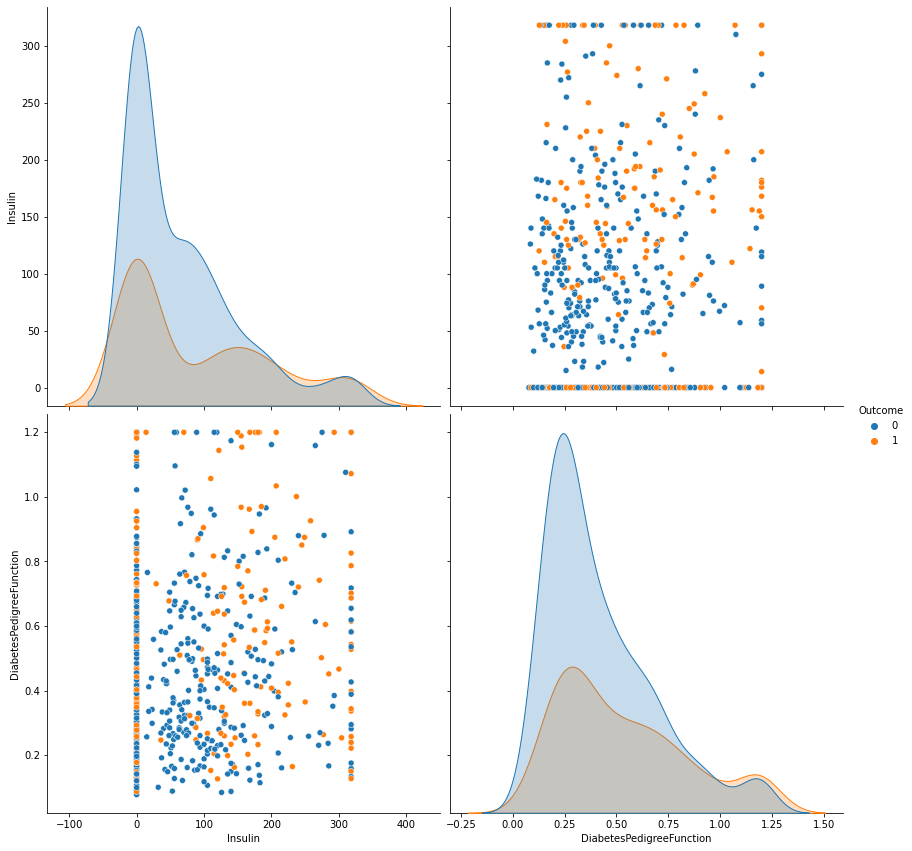

In [83]:
sns.pairplot(df, hue ='Outcome', vars=['Insulin', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

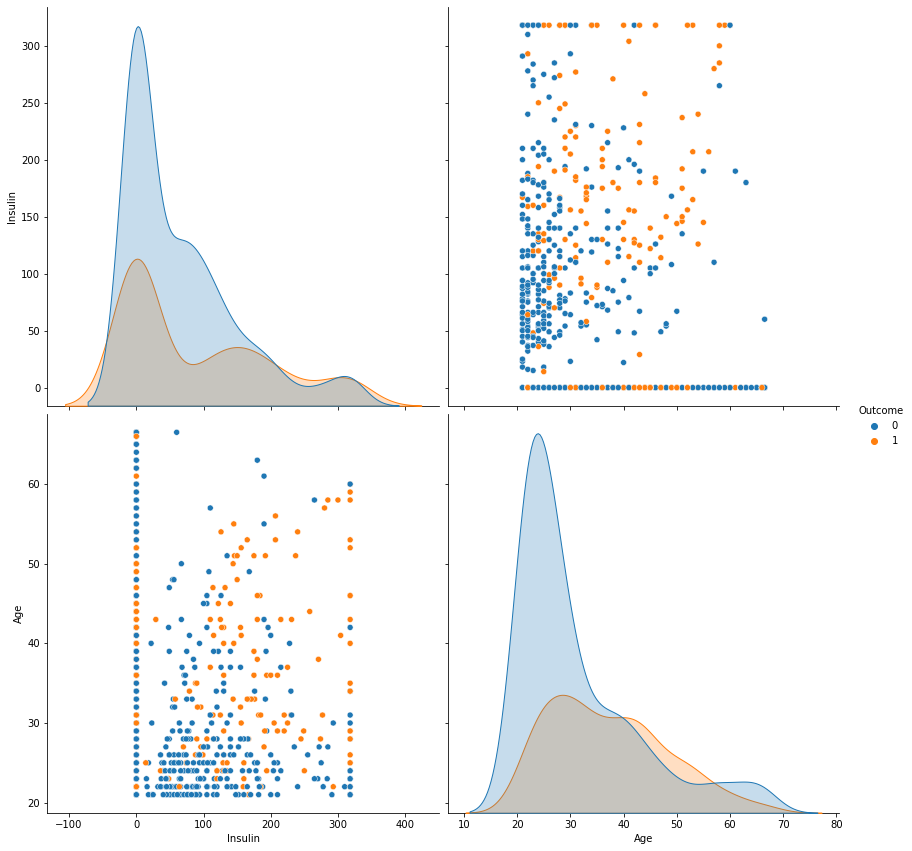

In [84]:
sns.pairplot(df, hue ='Outcome', vars=['Insulin', 'Age'], height=6, aspect=1 )

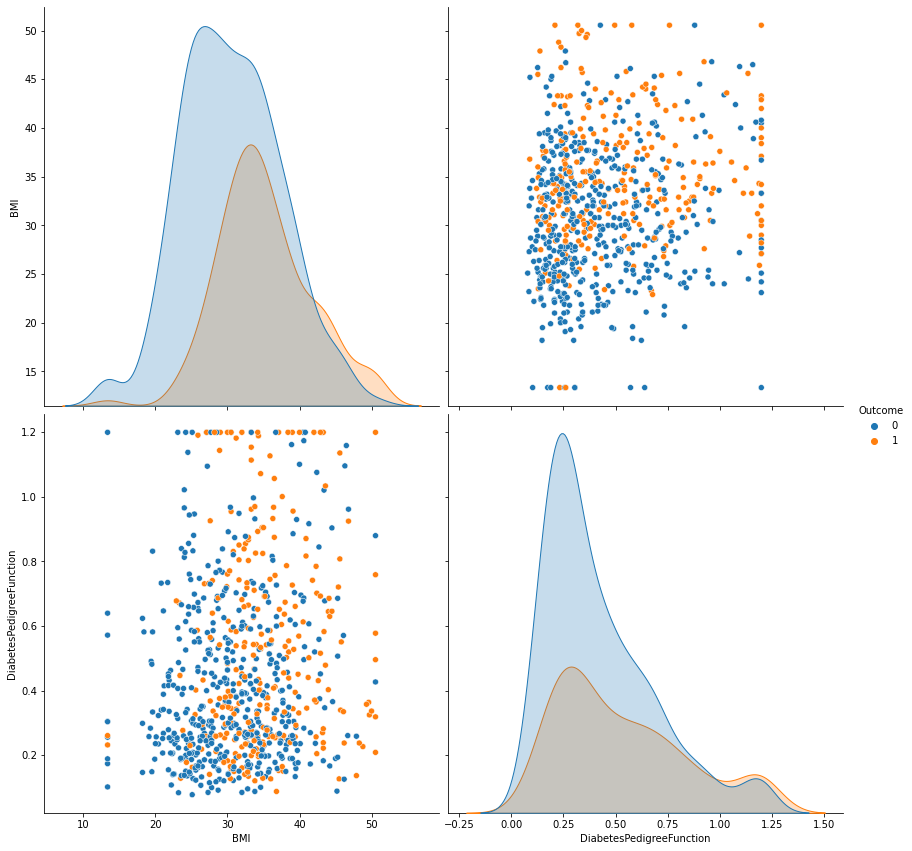

In [85]:
sns.pairplot(df, hue ='Outcome', vars=['BMI', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

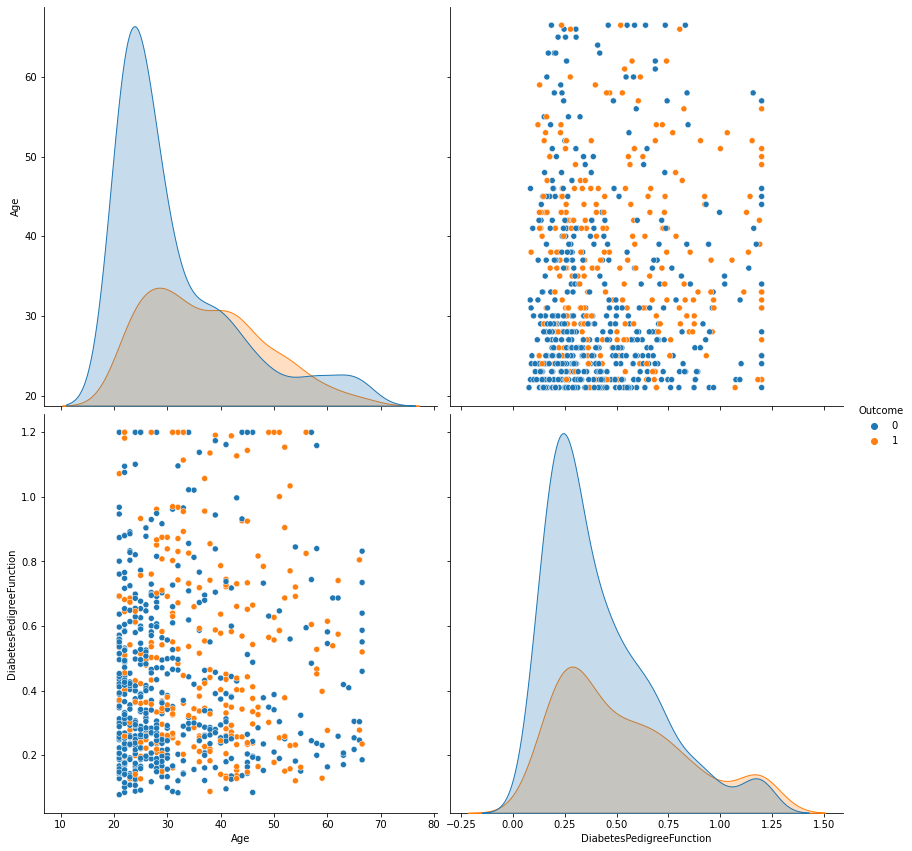

In [86]:
sns.pairplot(df, hue ='Outcome', vars=['Age', 'DiabetesPedigreeFunction'], height=6, aspect=1 )

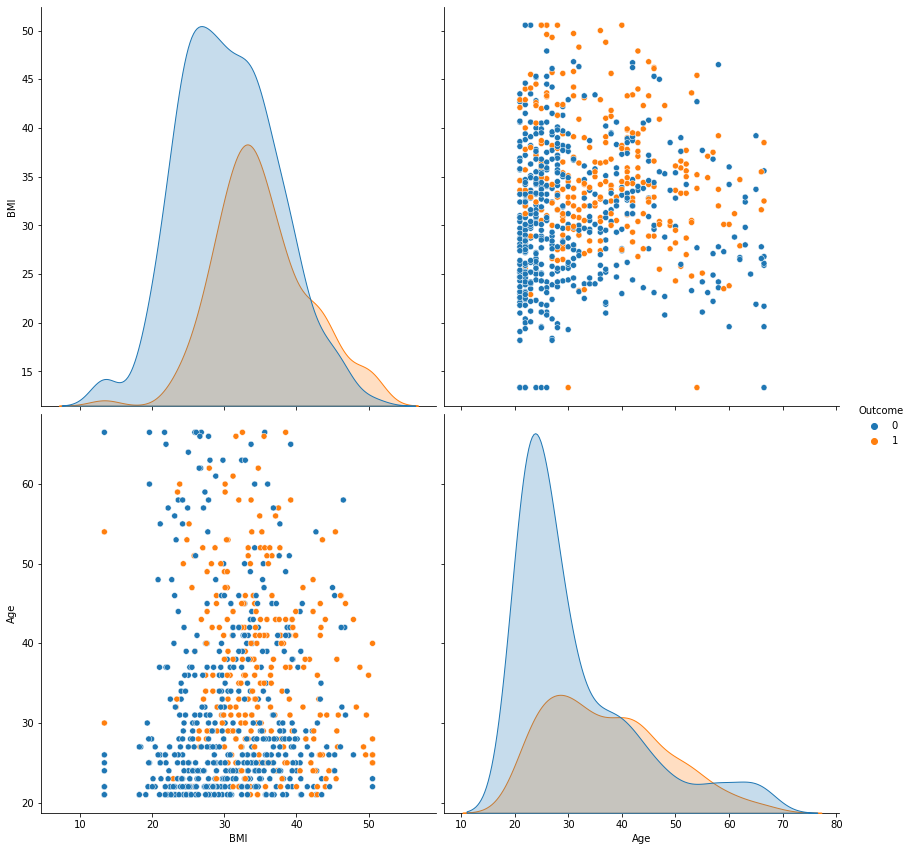

In [87]:
sns.pairplot(df, hue ='Outcome', vars=['BMI', 'Age'], height=6, aspect=1 )

#Note:we dont need to do data manupulation as our data is already well organised and in csv file.we dont need to do data blending as it means of merging several csv files but we have only 1 csv file.Feature generation means generating more features.We have 37 features already.We can't generate more features for this dataset

In [88]:
# Convert Catergorical values to numeric representation

Since,the categorical values in our original dataset is already represented as discrete,numerical 
values so we don't need to convert them using get_dummies or LabelEncoder

# Partitioning

In [89]:
X = df.drop('Outcome',axis=1)

In [90]:
X

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  
0                       0.627  50.0  
1                       0.351  31.0  
2                       0.672  32.0  
3                       0.167  21.0  
4                       1.200  33.0  
..                        ...   ...  
763                     0.171  63.0  
764                     0.340  27.0  
765                     0.245  30.0  
766                     0.349  47.0  
767                     0.315  23.0  

[768 rows x 8 columns]

In [91]:
Y= df['Outcome']

In [92]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [93]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [94]:
#HoldOut Validation Approach - Train-test split

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [96]:
y_test.value_counts()

0    157
1     74
Name: Outcome, dtype: int64

In [97]:
#Stratified Train Test Split

In [98]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y, test_size = 0.30, random_state = 0, stratify = Y)


In [99]:
y1_train.value_counts()

0    350
1    187
Name: Outcome, dtype: int64

In [100]:
y1_test.value_counts()

0    150
1     81
Name: Outcome, dtype: int64

# Normalization

In [101]:
# Feature Scaling

In [102]:
#We always scale the features in the range between 0 to 1 after partitioning

In [103]:
X.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.136230      70.684896      20.511719   73.652669   
std       3.344157   31.187468      14.197239      15.844744   93.576029   
min       0.000000   37.125000      35.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      13.500000  199.000000     107.000000      80.000000  318.125000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.125065                  0.458914   33.199870  
std      7.049584                  0.285596   11.628404  
min     13.350000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     50.550000                  1.200000   66.500000

In [104]:
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [106]:
#We will scale based on X_train and then transform both X_train and X_test

In [107]:
scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [108]:
X_test.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
661     0.074074  1.006216       0.569444         0.5375  0.000000  0.794355   
122     0.148148  0.434343       0.541667         0.3750  0.314342  0.544355   
113     0.296296  0.241647       0.375000         0.0000  0.000000  0.555108   
14      0.370370  0.801088       0.513889         0.2375  0.550098  0.334677   
529     0.000000  0.459207       0.416667         0.0000  0.000000  0.302419   

     DiabetesPedigreeFunction       Age  
661                  1.000000  0.021978  
122                  0.286738  0.043956  
113                  0.275090  0.087912  
14                   0.450717  0.659341  
529                  0.516129  0.219780

In [109]:
X_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   537.000000  537.000000     537.000000     537.000000  537.000000   
mean      0.284709    0.526466       0.503595       0.262453    0.245798   
std       0.249559    0.194833       0.197091       0.198480    0.301284   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.074074    0.384615       0.402778       0.000000    0.000000   
50%       0.222222    0.502720       0.513889       0.300000    0.141454   
75%       0.444444    0.651904       0.625000       0.412500    0.424361   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  537.000000                537.000000  537.000000  
mean     0.511584                  0.334667    0.277181  
std      0.191733                  0.253979    0.259788  
min      0.000000                  0.000000    0.000000  
25%      0.380376                  0.139785    0.065934  
50%      0.512097                  0.263441    0.175824  
75%      0.630376                  0.474014    0.439560  
max      1.000000                  1.000000    1.000000

In [110]:
X_test.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   231.000000  231.000000     231.000000     231.000000  231.000000   
mean      0.283149    0.512329       0.477092       0.242316    0.198333   
std       0.243908    0.191638       0.196578       0.196786    0.274620   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.074074    0.384615       0.361111       0.000000    0.000000   
50%       0.222222    0.471639       0.486111       0.262500    0.000000   
75%       0.444444    0.620824       0.597222       0.400000    0.331631   
max       0.962963    1.006216       1.000000       0.675000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  231.000000                231.000000  231.000000  
mean     0.488718                  0.338915    0.247086  
std      0.183635                  0.260879    0.244739  
min      0.000000                 -0.005376    0.000000  
25%      0.354839                  0.145161    0.043956  
50%      0.479839                  0.254480    0.153846  
75%      0.603495                  0.500448    0.395604  
max      1.000000                  1.000000    0.967033

In [111]:
scaler.fit(X1_train[scale_vars])
X1_train[scale_vars] = scaler.transform(X1_train[scale_vars])
X1_test[scale_vars] = scaler.transform(X1_test[scale_vars])

In [112]:
X1_test.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
608     0.000000  0.709653       0.652778         0.4875  0.855010  0.756720   
626     0.000000  0.542857       0.458333         0.0000  0.000000  0.305108   
678     0.222222  0.518147       0.236111         0.0000  0.000000  0.608871   
186     0.592593  0.888803       0.458333         0.4500  1.000000  0.450269   
520     0.148148  0.190734       0.486111         0.4000  0.207466  0.313172   

     DiabetesPedigreeFunction       Age  
608                  0.171123  0.131868  
626                  0.114082  0.000000  
678                  0.043672  0.087912  
186                  0.478610  0.857143  
520                  0.097148  0.087912

In [113]:
X1_train.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   537.000000  537.000000     537.000000     537.000000  537.000000   
mean      0.298158    0.517714       0.497181       0.253329    0.211240   
std       0.252040    0.189915       0.196220       0.204112    0.284410   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.074074    0.388417       0.402778       0.000000    0.000000   
50%       0.222222    0.487259       0.513889       0.275000    0.000000   
75%       0.444444    0.629344       0.625000       0.412500    0.361493   
max       1.000000    1.000000       1.000000       1.000000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  537.000000                537.000000  537.000000  
mean     0.504177                  0.338576    0.281130  
std      0.186269                  0.255331    0.260371  
min      0.000000                  0.000000    0.000000  
25%      0.377688                  0.144385    0.065934  
50%      0.501344                  0.258467    0.197802  
75%      0.616935                  0.477718    0.439560  
max      1.000000                  1.000000    1.000000

In [114]:
X1_test.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   231.000000  231.000000     231.000000     231.000000  231.000000   
mean      0.251884    0.521951       0.492003       0.263528    0.278669   
std       0.234711    0.199297       0.199789       0.183444    0.311187   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       0.074074    0.369884       0.375000       0.106250    0.000000   
50%       0.222222    0.505792       0.486111       0.300000    0.198035   
75%       0.370370    0.660232       0.625000       0.400000    0.440079   
max       1.000000    0.993822       1.000000       0.625000    1.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  231.000000                231.000000  231.000000  
mean     0.505935                  0.341633    0.237905  
std      0.197230                  0.253239    0.241898  
min      0.000000                  0.006239    0.000000  
25%      0.370968                  0.153298    0.043956  
50%      0.509409                  0.277184    0.153846  
75%      0.631720                  0.490196    0.373626  
max      1.000000                  1.000000    1.000000

# Feature Selection

In [115]:
X_train.head()

Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
580     0.000000  0.707848       0.763889         0.5750      0.0  0.772849   
418     0.074074  0.285159       0.458333         0.0000      0.0  0.130376   
764     0.148148  0.527584       0.486111         0.3375      0.0  0.630376   
363     0.296296  0.676768       0.597222         0.0000      0.0  0.676075   
757     0.000000  0.533800       0.513889         0.0000      0.0  0.616935   

     DiabetesPedigreeFunction       Age  
580                  0.257168  0.000000  
418                  0.483871  0.131868  
764                  0.229391  0.131868  
363                  0.390681  1.000000  
757                  0.155914  0.681319

In [116]:
#Algorithm 3 - Feature Selection using Information Gain

In [117]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train, random_state = 20)
mutual_info


array([0.03447149, 0.10217379, 0.0074756 , 0.        , 0.0126585 ,
       0.08167283, 0.        , 0.05828565])

In [118]:
print(len(mutual_info))
print(X_train.shape)

8
(537, 8)


In [119]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Glucose                     0.102174
BMI                         0.081673
Age                         0.058286
Pregnancies                 0.034471
Insulin                     0.012658
BloodPressure               0.007476
SkinThickness               0.000000
DiabetesPedigreeFunction    0.000000
dtype: float64

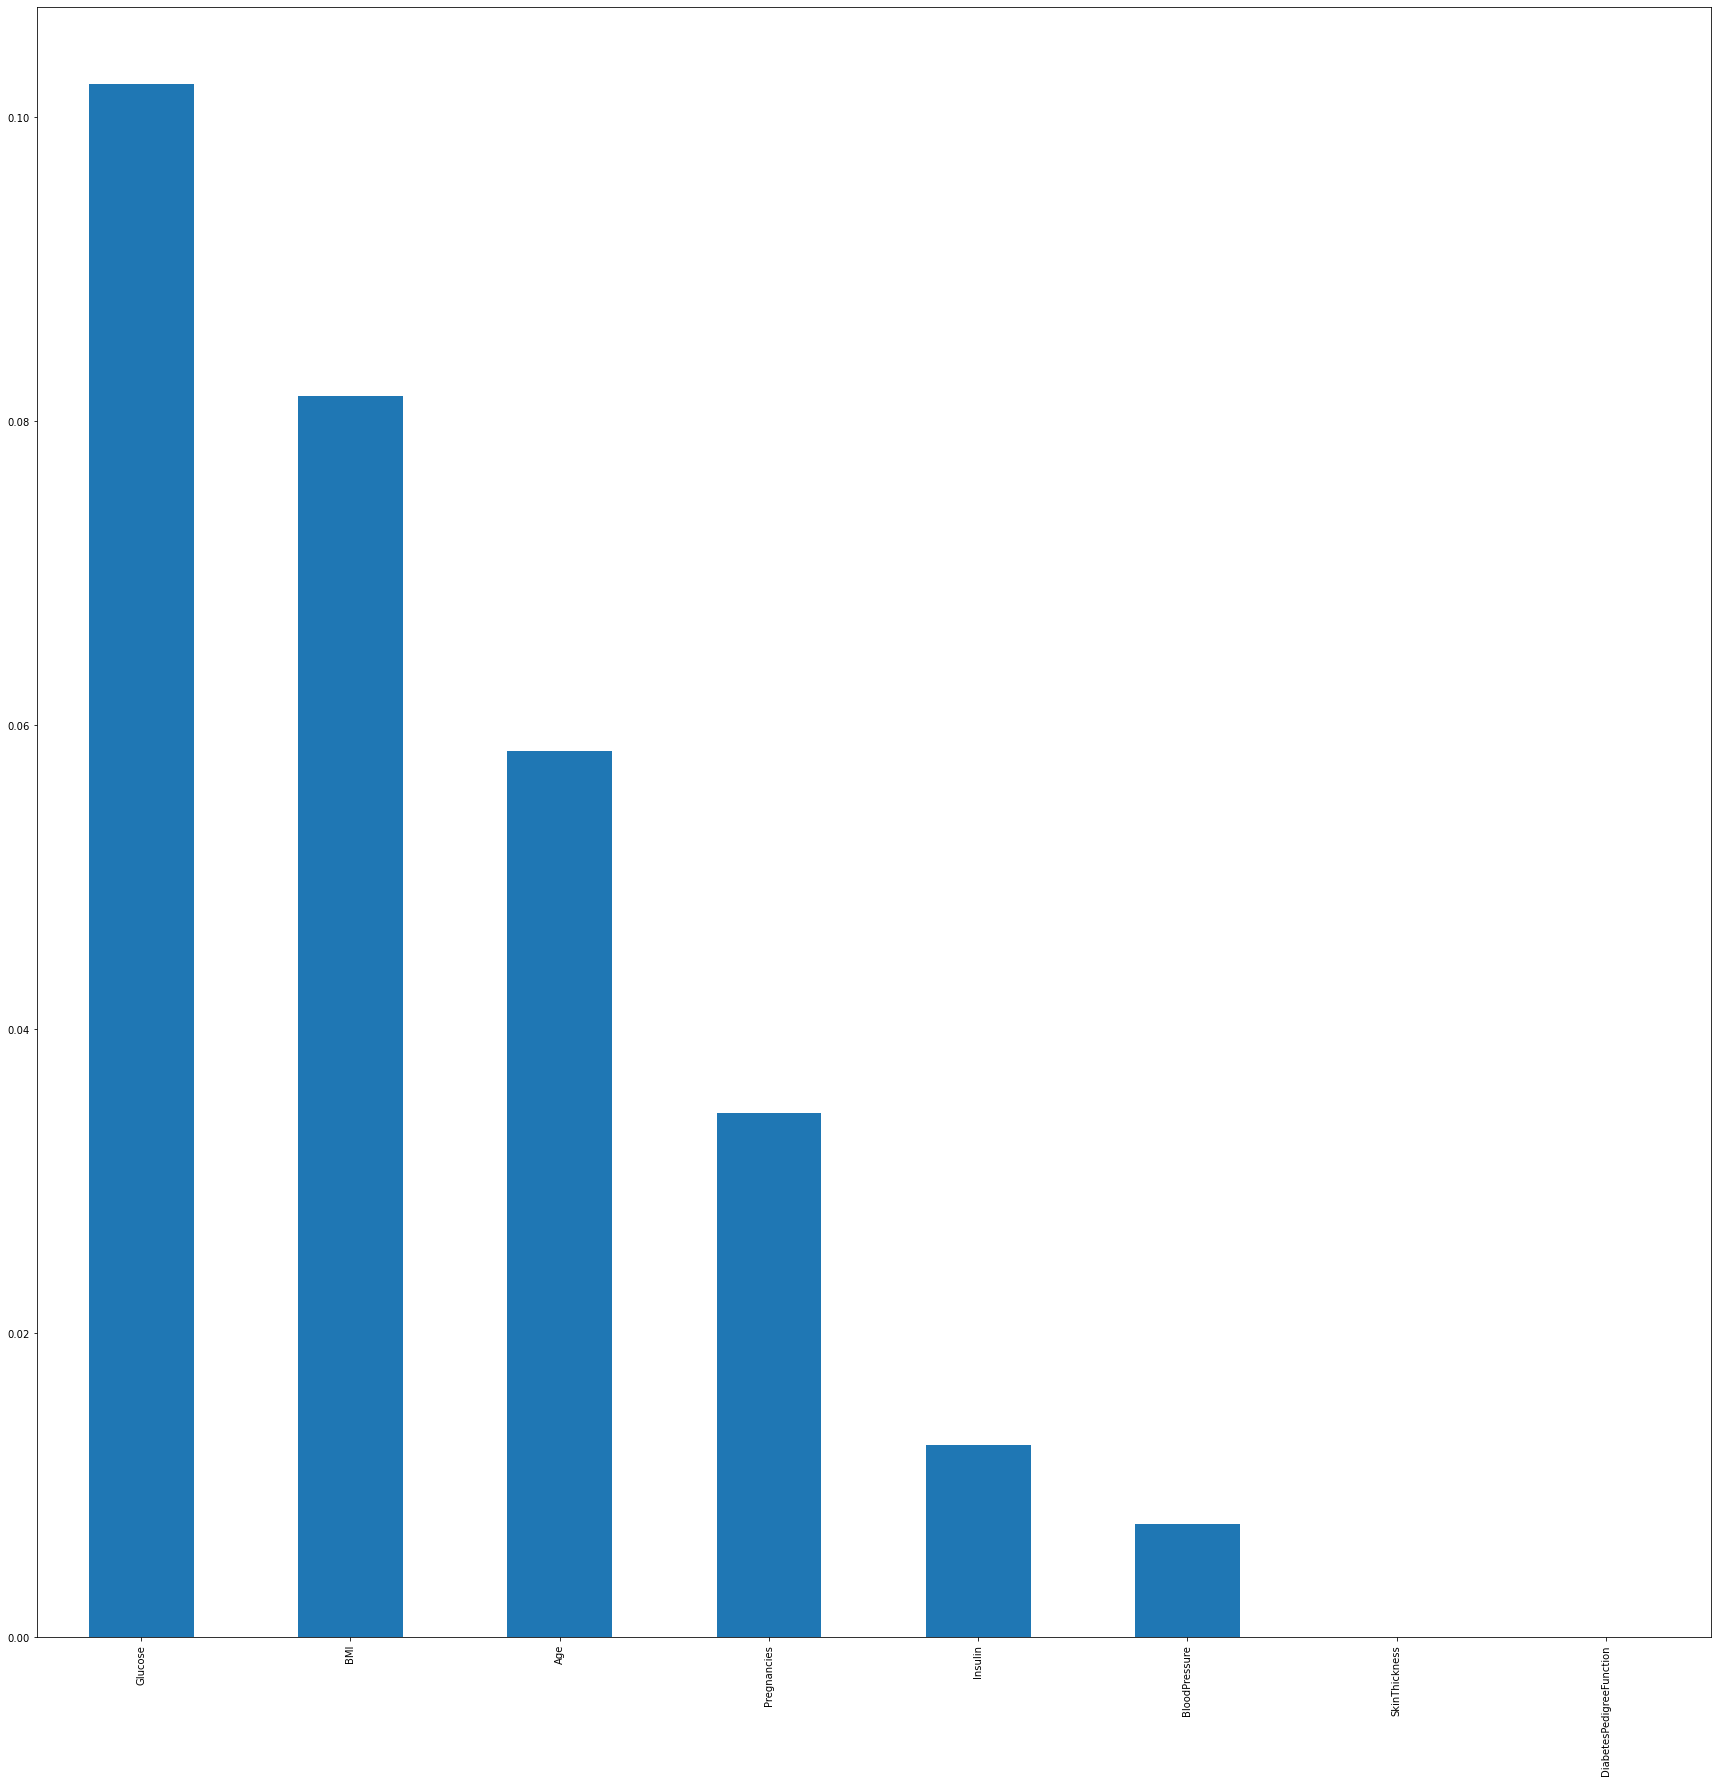

In [120]:
plt.figure(figsize = (30, 30))
mutual_info.sort_values(ascending = False).plot.bar();

In [121]:
#Algorithm 4 - Feature Selection using RFECV (Recursive Feature Elimination with Cross Validation)

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [123]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 4


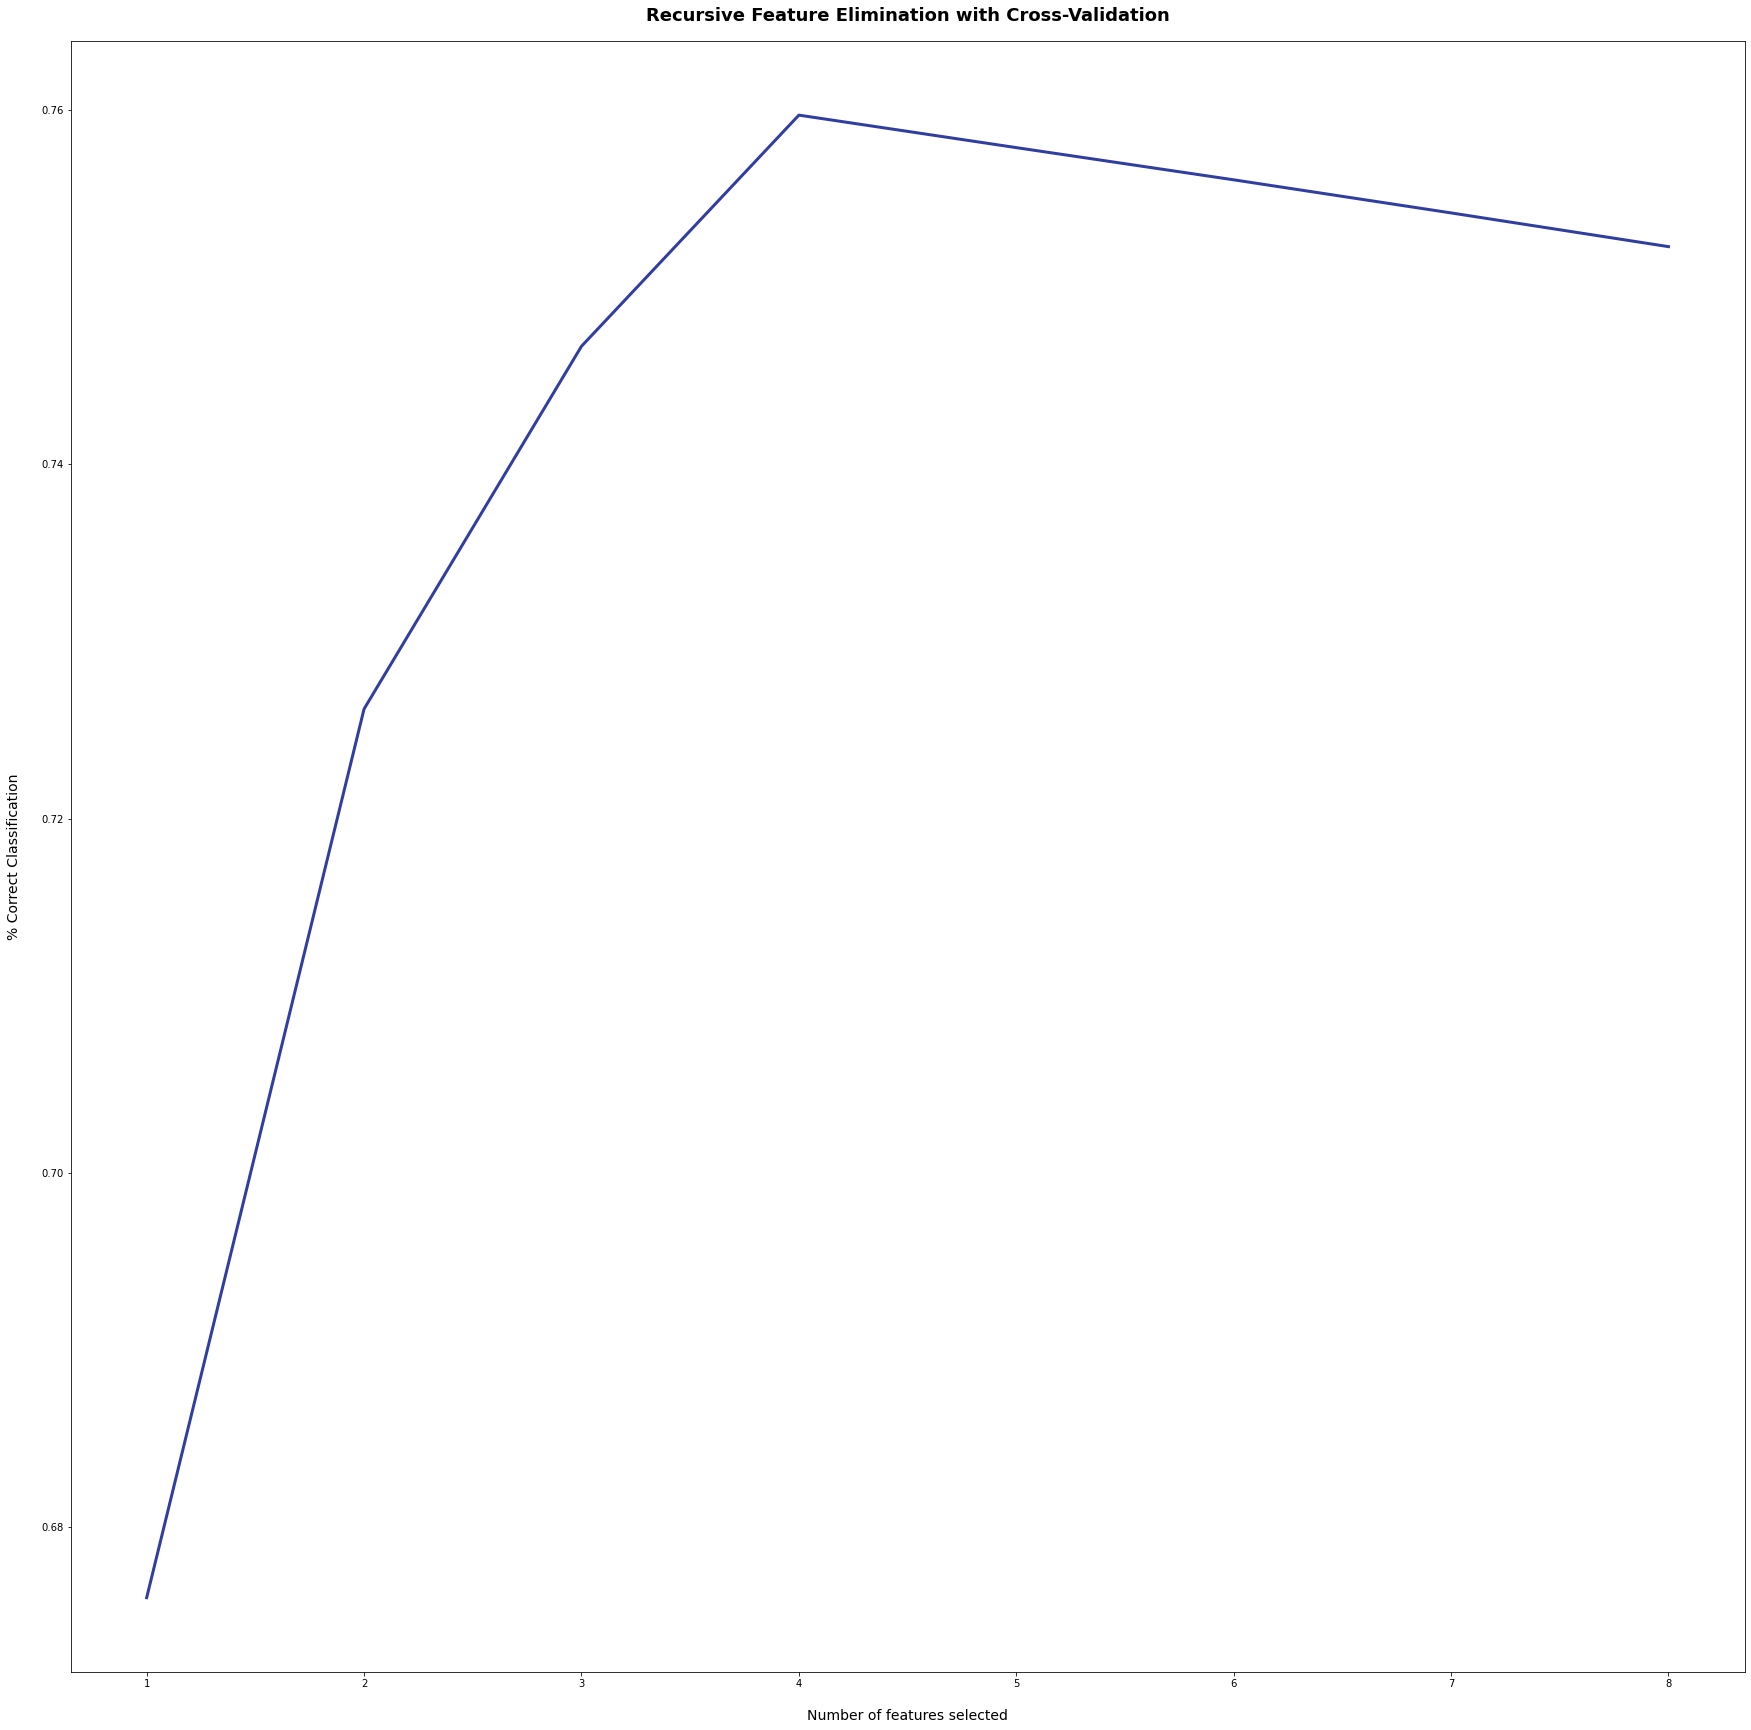

In [124]:
plt.figure(figsize=(30, 30))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [125]:
print(np.where(rfecv.support_ == False)[0])

[0 2 3 4]


In [126]:
selected_features = X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1)

In [127]:
rfecv.estimator_.feature_importances_

array([0.3598012 , 0.24408984, 0.19645621, 0.19965275])

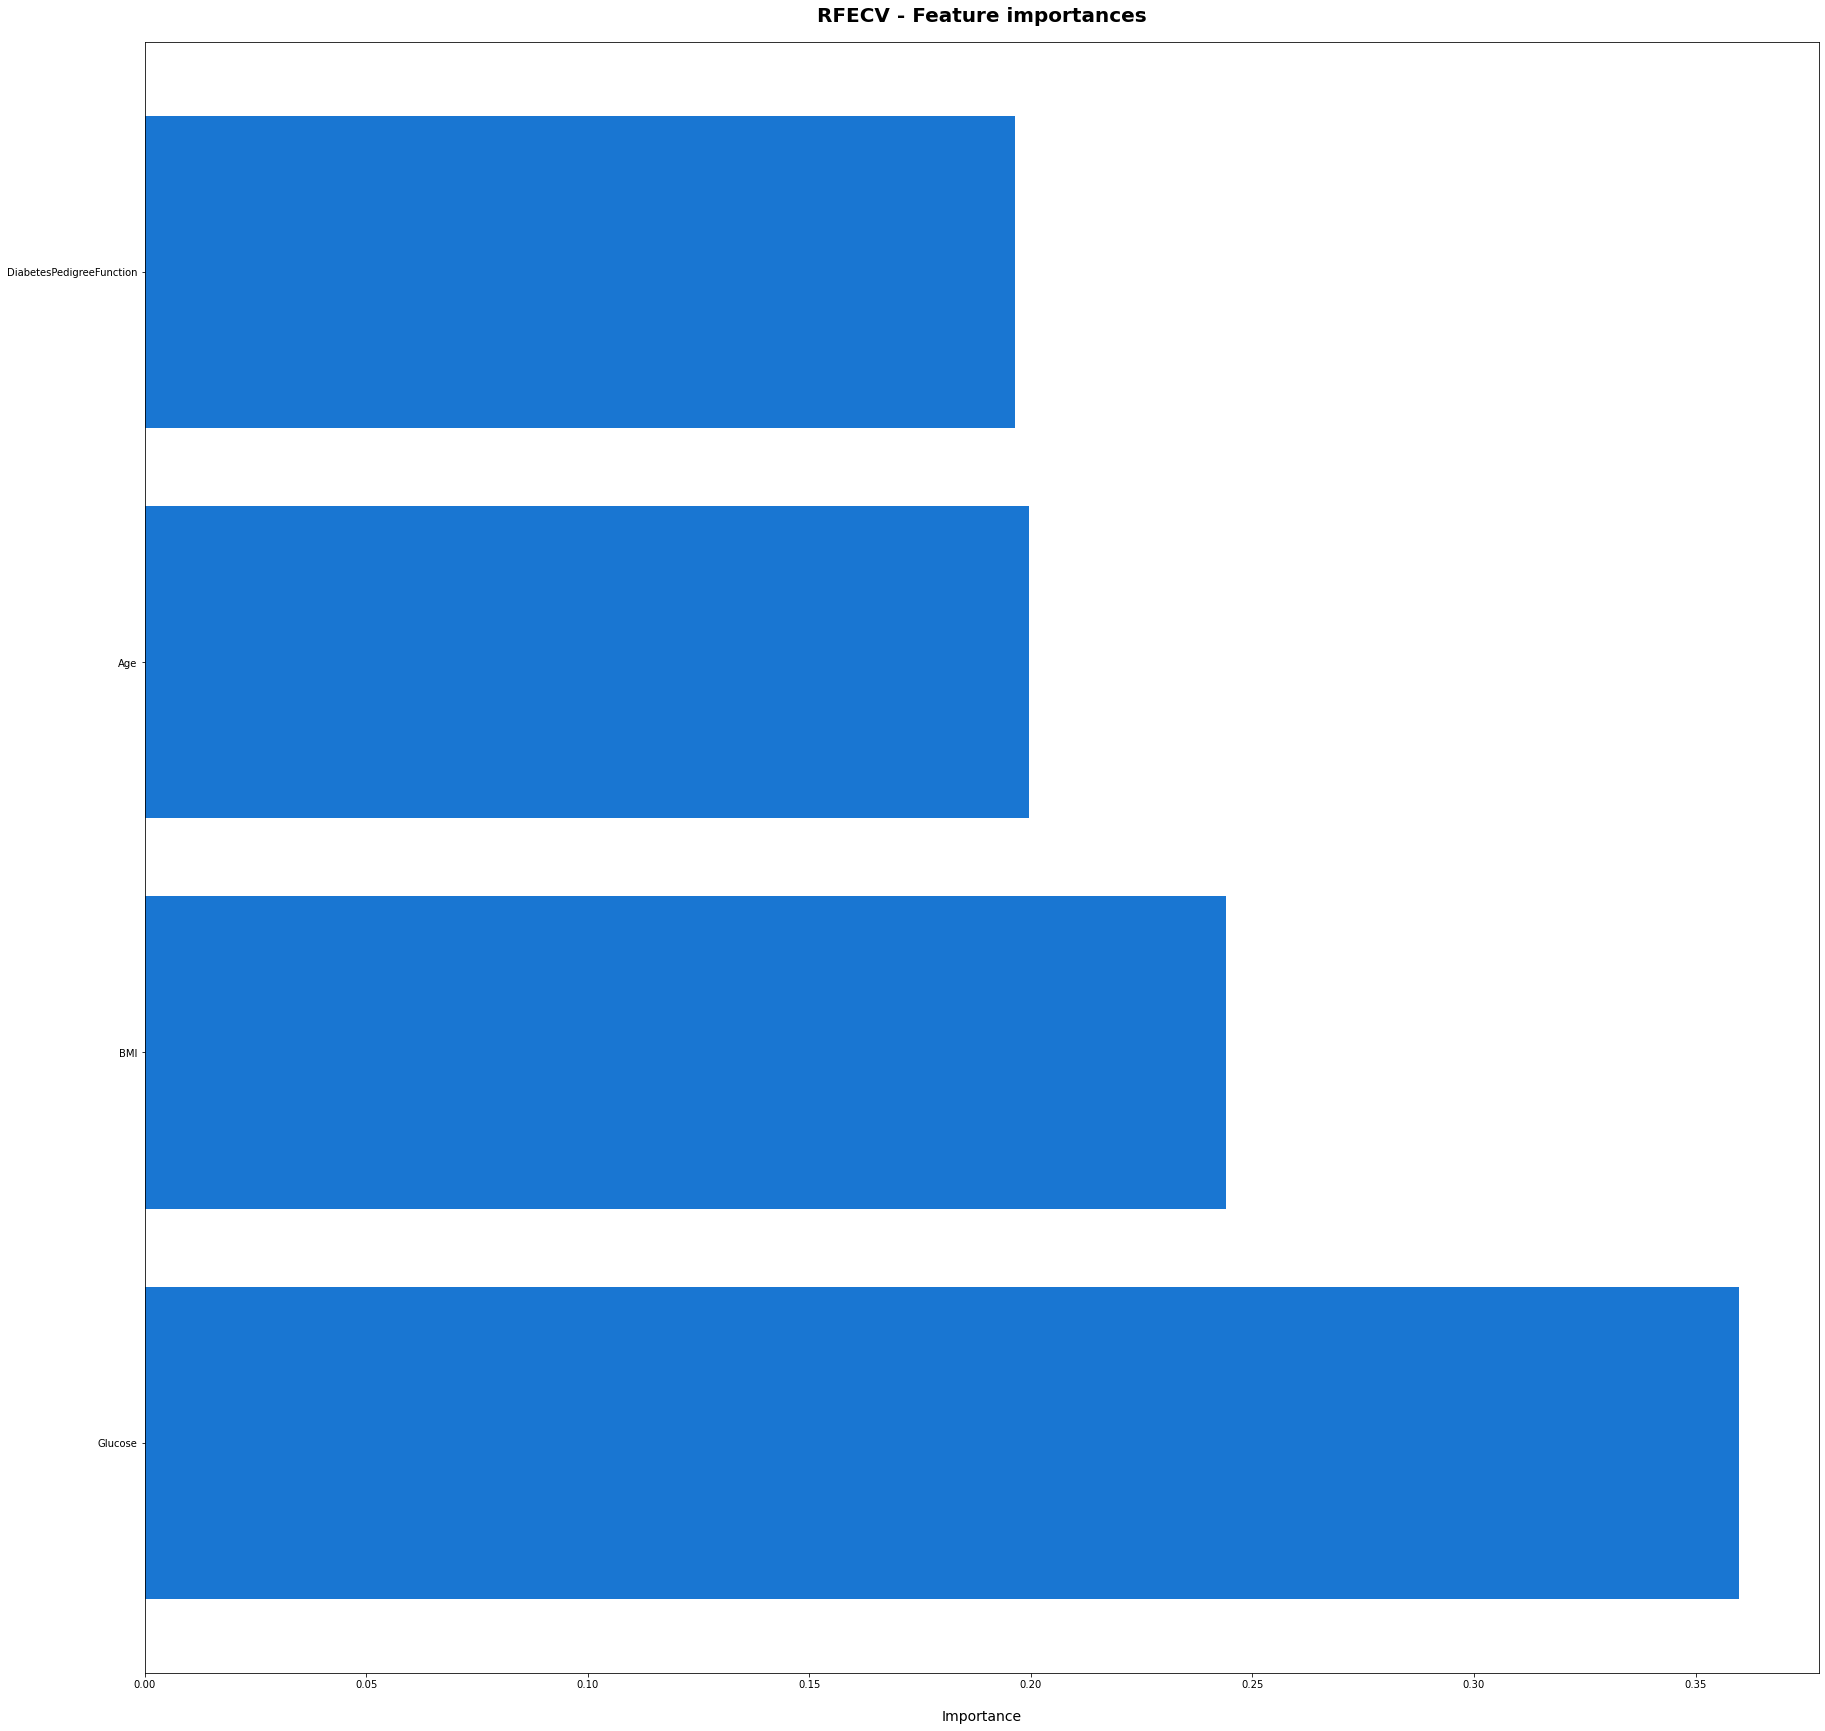

In [128]:
dset = pd.DataFrame()
dset['attr'] = selected_features.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(30, 30))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()


In [129]:
dset

attr  importance
0                   Glucose    0.359801
1                       BMI    0.244090
3                       Age    0.199653
2  DiabetesPedigreeFunction    0.196456

In [130]:
#Algorithm 1 - Dropping Constant Features using Variance Threshold Technique


In [131]:
from sklearn.feature_selection import VarianceThreshold
# By default, the threshold = 0 i.e. it will remove the zero-variance threshold
var_thresh = VarianceThreshold() # by default the threshold = 0
var_thresh.fit(X_train)

VarianceThreshold()

In [132]:
print("Features Selected: ", X_train.columns[var_thresh.get_support()])

Features Selected:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [133]:
len(X_train.columns[var_thresh.get_support()])

8

In [134]:
#There's no feature with zero variance

In [135]:
#Algorithm 2 - Feature Selection with Pearson's correlation


In [136]:
#Idea Highly correlated features with the target variable are important features, High correlation between features, (say over 90% or over 80%) indicate the existence of duplicate features.In case of duplicate features, we do not need to take all the features but one one of them would suffice


In [137]:
# Let's find the feature correlations

corr = X_train.corr()
corr

# Note that the correlation values lie between -1 and +1
# A correlation value close to -1 indicates a strong negative linear correlation
# A correlation value close to +1 indicates a strong positive linear correlation
# A correlation value close to 0 indicates no linear correlation

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.134318       0.164904      -0.091769   
Glucose                      0.134318  1.000000       0.196127       0.063151   
BloodPressure                0.164904  0.196127       1.000000       0.143033   
SkinThickness               -0.091769  0.063151       0.143033       1.000000   
Insulin                     -0.102373  0.321694       0.026729       0.488037   
BMI                         -0.021351  0.262800       0.271481       0.422384   
DiabetesPedigreeFunction    -0.033387  0.104934       0.061178       0.174144   
Age                          0.542034  0.291067       0.283381      -0.164837   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.102373 -0.021351                 -0.033387   
Glucose                   0.321694  0.262800                  0.104934   
BloodPressure             0.026729  0.271481                  0.061178   
SkinThickness             0.488037  0.422384                  0.174144   
Insulin                   1.000000  0.215581                  0.177818   
BMI                       0.215581  1.000000                  0.156605   
DiabetesPedigreeFunction  0.177818  0.156605                  1.000000   
Age                      -0.096962  0.011751                  0.058772   

                               Age  
Pregnancies               0.542034  
Glucose                   0.291067  
BloodPressure             0.283381  
SkinThickness            -0.164837  
Insulin                  -0.096962  
BMI                       0.011751  
DiabetesPedigreeFunction  0.058772  
Age                       1.000000

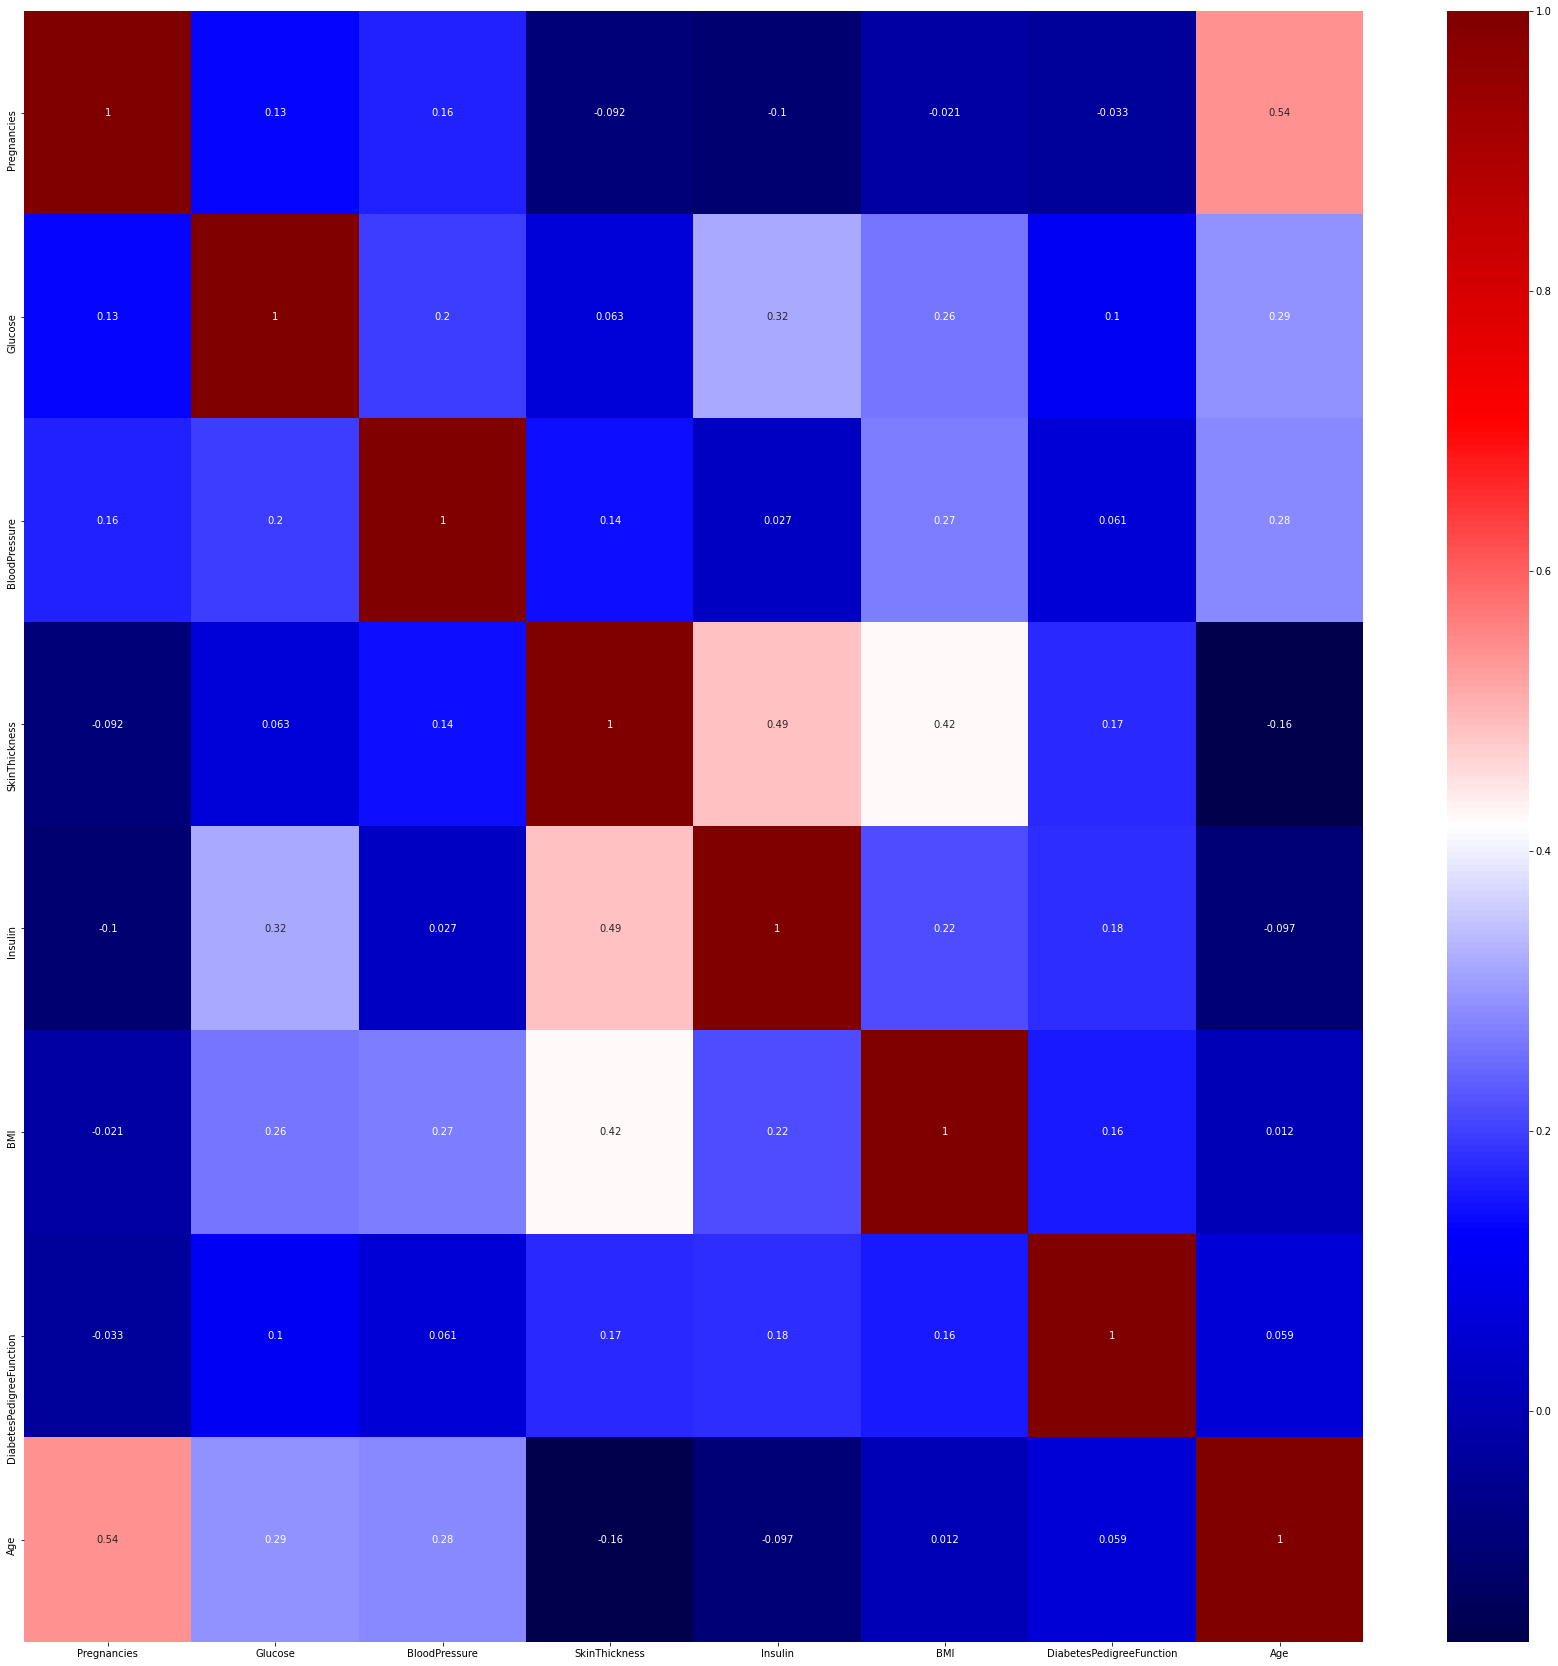

In [138]:
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic");

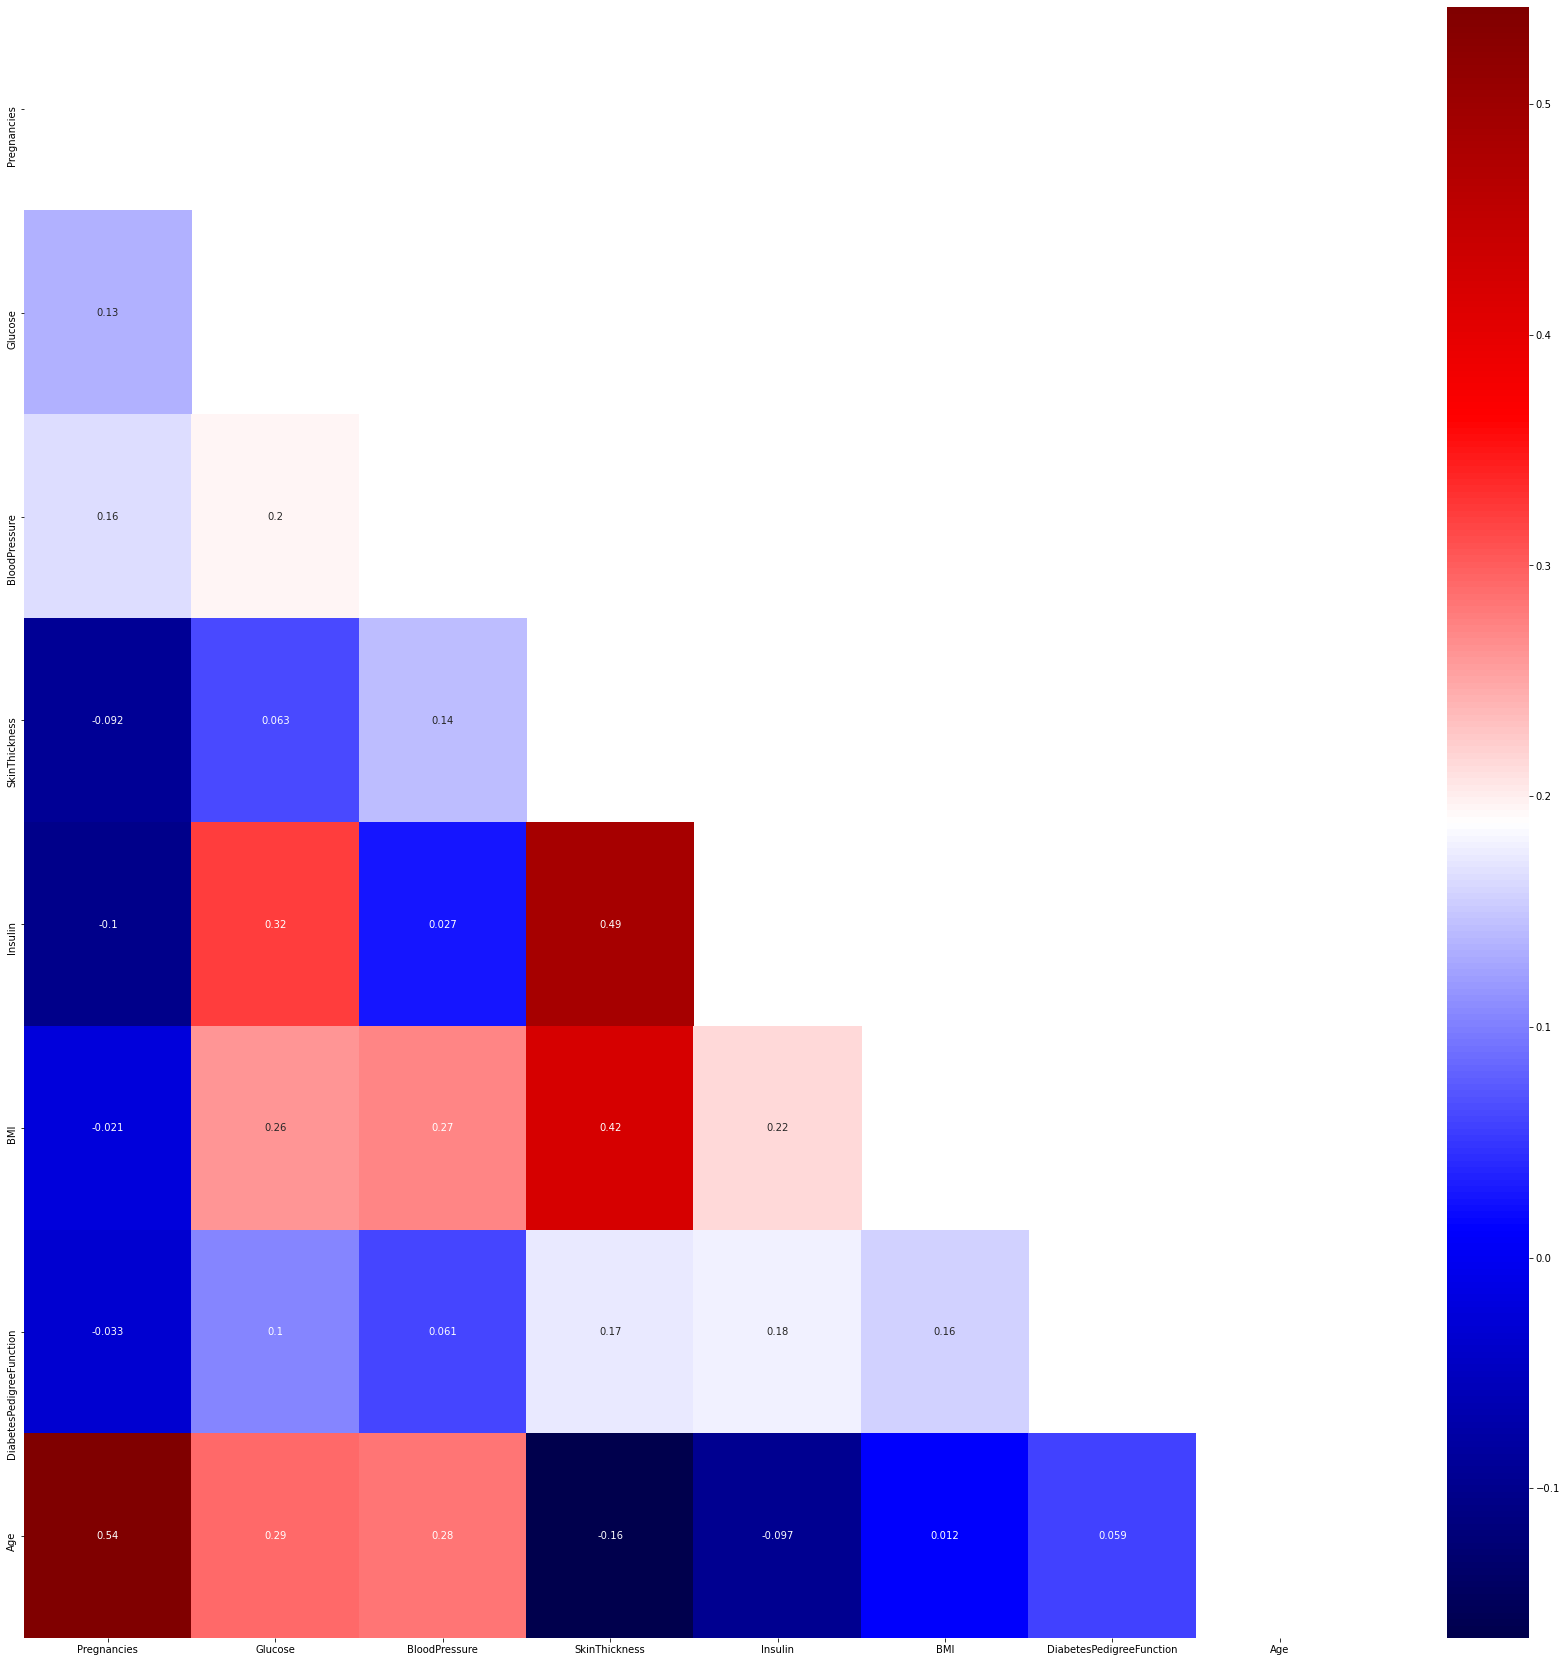

In [139]:
# use of the mask 
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (30,30))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [140]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [141]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [142]:
X_train.drop(columns = 'SkinThickness', axis=1, inplace=True)
X_test.drop(columns = 'SkinThickness', axis=1, inplace=True)

print(X_train)
print(X_test)

     Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
580     0.000000  0.707848       0.763889  0.000000  0.772849   
418     0.074074  0.285159       0.458333  0.000000  0.130376   
764     0.148148  0.527584       0.486111  0.000000  0.630376   
363     0.296296  0.676768       0.597222  0.000000  0.676075   
757     0.000000  0.533800       0.513889  0.000000  0.616935   
..           ...       ...            ...       ...       ...   
763     0.740741  0.397047       0.569444  0.565815  0.525538   
192     0.518519  0.757576       0.430556  0.000000  0.458333   
629     0.296296  0.353535       0.416667  0.000000  0.305108   
559     0.814815  0.297591       0.541667  0.000000  0.450269   
684     0.370370  0.614608       0.652778  0.000000  0.000000   

     DiabetesPedigreeFunction       Age  
580                  0.257168  0.000000  
418                  0.483871  0.131868  
764                  0.229391  0.131868  
363                  0.390681  1.000000  
757      

In [143]:
X1_train.drop(columns = 'SkinThickness', axis=1, inplace=True)
X1_test.drop(columns = 'SkinThickness', axis=1, inplace=True)

print(X1_train)
print(X1_test)

     Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
34      0.740741  0.524324       0.597222  0.000000  0.383065   
221     0.148148  0.746718       0.763889  0.000000  0.490591   
531     0.000000  0.431660       0.569444  0.000000  0.858871   
518     0.962963  0.240154       0.347222  0.000000  0.522849   
650     0.074074  0.332819       0.263889  0.314342  0.318548   
..           ...       ...            ...       ...       ...   
628     0.370370  0.561390       0.625000  0.000000  0.571237   
456     0.074074  0.604633       0.263889  0.000000  0.358871   
398     0.222222  0.277220       0.486111  0.000000  0.208333   
6       0.222222  0.252510       0.208333  0.276621  0.474462   
294     0.000000  0.765251       0.208333  0.000000  0.229839   

     DiabetesPedigreeFunction       Age  
34                   0.386809  0.527473  
221                  0.647950  0.989011  
531                  0.541889  0.065934  
518                  0.090909  0.439560  
650      

# Model Creation and Evaluation

In [144]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [145]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.638733705772812
Test Accuracy:  0.6796536796536796


In [146]:
ac_zero1 = accuracy_score(y_pred_test, y_test)

In [147]:
ac_zero1

0.6796536796536796

In [148]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[157   0]
 [ 74   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.680     1.000     0.809       157
           1      0.000     0.000     0.000        74

    accuracy                          0.680       231
   macro avg      0.340     0.500     0.405       231
weighted avg      0.462     0.680     0.550       231



# Decision Tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [150]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
Y_pred=dt.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score

In [153]:
ac_dt1=accuracy_score(y_test,Y_pred)

In [154]:
ac_dt1

0.7705627705627706

Depth =  2 , Training Accuracy =  0.7579143389199255 , Test Accuracy =  0.7272727272727273 , Diff =  3.0641611647198252  %
Depth =  3 , Training Accuracy =  0.7672253258845437 , Test Accuracy =  0.7272727272727273 , Diff =  3.9952598611816437  %
Depth =  4 , Training Accuracy =  0.7951582867783985 , Test Accuracy =  0.7532467532467533 , Diff =  4.191153353164523  %
Depth =  5 , Training Accuracy =  0.8286778398510242 , Test Accuracy =  0.7662337662337663 , Diff =  6.24440736172579  %
Depth =  6 , Training Accuracy =  0.8547486033519553 , Test Accuracy =  0.7575757575757576 , Diff =  9.717284577619779  %
Depth =  7 , Training Accuracy =  0.8864059590316573 , Test Accuracy =  0.7532467532467533 , Diff =  13.315920578490402  %
Depth =  8 , Training Accuracy =  0.9068901303538175 , Test Accuracy =  0.7619047619047619 , Diff =  14.498536844905562  %
Depth =  9 , Training Accuracy =  0.9329608938547486 , Test Accuracy =  0.7575757575757576 , Diff =  17.5385136278991  %
Depth =  10 , Training

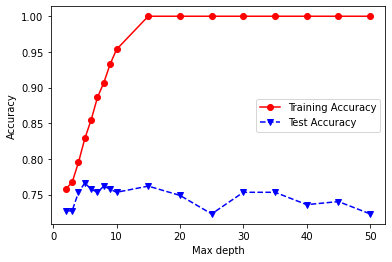

In [155]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [156]:
# create a model 
dt2 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [157]:
Y_predt1=dt2.predict(X_test)

In [158]:
from sklearn.metrics import accuracy_score

In [159]:
ac_dt2=accuracy_score(y_test,Y_predt1)

In [160]:
ac_dt2

0.7272727272727273

# KNN

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [162]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [163]:
Y_pred_knn=knn.predict(X_test)

In [164]:
ac_knn1=accuracy_score(y_test,Y_pred_knn)

In [165]:
ac_knn1

0.7316017316017316

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.670995670995671 , Difference =  32.9004329004329 %
K =  5 , Training Accuracy =  0.8175046554934823  Test Accuracy =  0.7316017316017316 , Difference =  8.590292389175069 %
K =  10 , Training Accuracy =  0.7839851024208566  Test Accuracy =  0.7316017316017316 , Difference =  5.238337081912503 %
K =  15 , Training Accuracy =  0.776536312849162  Test Accuracy =  0.7532467532467533 , Difference =  2.328955960240875 %
K =  20 , Training Accuracy =  0.7690875232774674  Test Accuracy =  0.7445887445887446 , Difference =  2.4498778688722855 %
K =  25 , Training Accuracy =  0.7746741154562383  Test Accuracy =  0.7489177489177489 , Difference =  2.575636653848945 %
K =  30 , Training Accuracy =  0.7579143389199255  Test Accuracy =  0.7662337662337663 , Difference =  0.8319427313840722 %
K =  60 , Training Accuracy =  0.7355679702048417  Test Accuracy =  0.7489177489177489 , Difference =  1.3349778712907212 %
K =  100 , Training Accuracy =  0

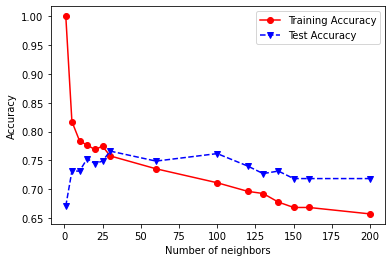

In [166]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.683982683982684 , Difference =  31.601731601731597 %
K =  5 , Training Accuracy =  0.7988826815642458  Test Accuracy =  0.7445887445887446 , Difference =  5.429393697550122 %
K =  10 , Training Accuracy =  0.770949720670391  Test Accuracy =  0.7662337662337663 , Difference =  0.47159544366247586 %
K =  15 , Training Accuracy =  0.776536312849162  Test Accuracy =  0.7748917748917749 , Difference =  0.1644537957387171 %
K =  20 , Training Accuracy =  0.7430167597765364  Test Accuracy =  0.7619047619047619 , Difference =  1.88880021282255 %
K =  25 , Training Accuracy =  0.7579143389199255  Test Accuracy =  0.7878787878787878 , Difference =  2.99644489588623 %
K =  30 , Training Accuracy =  0.7579143389199255  Test Accuracy =  0.7748917748917749 , Difference =  1.6977435971849308 %
K =  40 , Training Accuracy =  0.7486033519553073  Test Accuracy =  0.7619047619047619 , Difference =  1.3301409949454612 %
K =  50 , Training Accuracy =  0

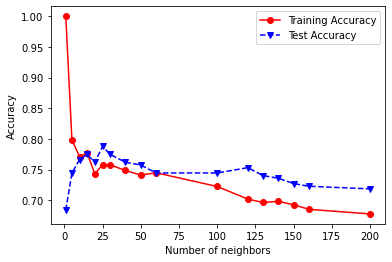

In [167]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [168]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr3 = LogisticRegression(penalty = 'none')

lr3.fit(X_train, y_train)
y_pred_train = lr3.predict(X_train)
y_pred_test = lr3.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y_test)

lr4 = LogisticRegression(penalty = 'l2')

lr4.fit(X_train, y_train)
y_pred_train = lr4.predict(X_train)
y_pred_test = lr4.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Logistic Regression with no regularization
Train Accuracy:  0.7728119180633147
Test Accuracy:  0.7835497835497836

Logistic Regression with L2 regularization
Train Accuracy:  0.7597765363128491
Test Accuracy:  0.7835497835497836


In [169]:
ac_lr1

0.7835497835497836

# Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [171]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [172]:
Y_pred_rf=rf.predict(X_test)

In [173]:
ac_rf1=accuracy_score(y_test,Y_pred_rf)

In [174]:
ac_rf1

0.7878787878787878

In [175]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.6256983240223464
Test Accuracy:  0.6277056277056277


In [176]:
ac_perceptron1 = accuracy_score(y_pred_test, y_test)

In [177]:
ac_perceptron1

0.6277056277056277

In [178]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))

Train Accuracy:  0.638733705772812
Test Accuracy:  0.6796536796536796


In [179]:
ac_naive1 = accuracy_score(y_pred_test, y_test)

In [180]:
ac_naive1

0.6796536796536796

In [181]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))


Train Accuracy:  0.7635009310986964
Test Accuracy:  0.7792207792207793


In [182]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[142  15]
 [ 36  38]]

Classification Report
              precision    recall  f1-score   support

           0      0.798     0.904     0.848       157
           1      0.717     0.514     0.598        74

    accuracy                          0.779       231
   macro avg      0.757     0.709     0.723       231
weighted avg      0.772     0.779     0.768       231



In [183]:
ac_svc1 = accuracy_score(y_pred_test, y_test)

In [184]:
ac_svc1

0.7792207792207793

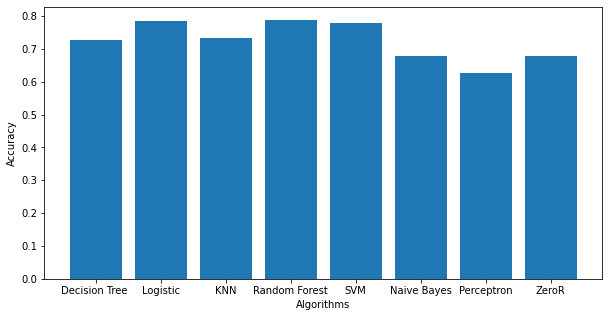

In [185]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt2,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [186]:
#Manual

In [187]:
dt=DecisionTreeClassifier(max_depth=2,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [188]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100
accuracy_dt

72.72727272727273

In [189]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.758
Accuracy on test set: 0.727


In [190]:
accuracy_score(prediction,y_test)

0.7272727272727273

In [191]:
#now let's try to do hyperparameter

In [192]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [193]:
#let's try with Randomized Search Cv

In [194]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [195]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [196]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 112,
 'criterion': 'entropy'}

In [197]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='log2',
                       min_samples_leaf=8, min_samples_split=14)

In [198]:
best_random_grid=rf_randomcv.best_estimator_

In [199]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.7402597402597403


In [200]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [201]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[134  23]
 [ 37  37]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       157
           1       0.62      0.50      0.55        74

    accuracy                           0.74       231
   macro avg       0.70      0.68      0.68       231
weighted avg       0.73      0.74      0.73       231



In [202]:
#GridSearch CV 

In [203]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 14,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 112,
 'criterion': 'entropy'}

In [204]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['entropy'], 'max_depth': [112], 'max_features': ['log2'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [16, 15, 14, 17, 18], 'splitter': ['best']}


In [205]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [112],
                         'max_features': ['log2'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [16, 15, 14, 17, 18],
                         'splitter': ['best']},
             verbose=2)

In [206]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15)

In [207]:
best_grid=grid_search.best_estimator_

In [208]:
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=112, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15)

In [209]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[132  25]
 [ 37  37]]
Accuracy Score 0.7316017316017316
Classification report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       157
           1       0.60      0.50      0.54        74

    accuracy                           0.73       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.72      0.73      0.72       231



# KNN HPT

In [210]:
#Manual

In [211]:
knn=KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [212]:
pred1=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,pred1)*100
accuracy_knn

75.32467532467533

In [213]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.777
Accuracy on test set: 0.753


In [214]:
accuracy_score(pred1,y_test)

0.7532467532467533

In [215]:
#now let's try to do hyperparameter

In [216]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [217]:
#let's try with Randomized Search Cv

In [218]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [219]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [220]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 12, 'metric': 'minkowski'}

In [221]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [222]:
best_random_grid1=rf3_randomcv.best_estimator_

In [223]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.7402597402597403


In [224]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [225]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[137  20]
 [ 40  34]]
0.7402597402597403
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.63      0.46      0.53        74

    accuracy                           0.74       231
   macro avg       0.70      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231



In [226]:
#GridSearch CV 

In [227]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 12, 'metric': 'minkowski'}

In [228]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [12, 14, 16, 10, 8], 'metric': ['minkowski']}


In [229]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [12, 14, 16, 10, 8],
                         'weights': ['distance']},
             verbose=2)

In [230]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [231]:
best_grid1=grid_search.best_estimator_

In [232]:
best_grid1

KNeighborsClassifier(n_neighbors=14, weights='distance')

In [233]:
y_pred4=best_grid1.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[137  20]
 [ 41  33]]
Accuracy Score 0.7359307359307359
Classification report:               precision    recall  f1-score   support

           0       0.77      0.87      0.82       157
           1       0.62      0.45      0.52        74

    accuracy                           0.74       231
   macro avg       0.70      0.66      0.67       231
weighted avg       0.72      0.74      0.72       231



# Logistic regression

In [234]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X_train, y_train)
y_pred_train = clf6.predict(X_train)
y_pred_test = clf6.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.7728119180633147
Test Accuracy:  0.7835497835497836



In [235]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [236]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.763475 using {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.762846 (0.039786) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762846 (0.039786) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.763475 (0.040099) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.760377 (0.041104) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760377 (0.041104) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759108 (0.041587) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.757920 (0.044851) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.757920 (0.044851) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.750443 (0.041687) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.711344 (0.045171) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.711344 (0.045171) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.684684 (0.032668) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.638749 (0.007877) wit

In [237]:
grid_y_predicted = grid_result.predict(X_test)

In [238]:
X_test

Pregnancies   Glucose  BloodPressure   Insulin       BMI  \
661     0.074074  1.006216       0.569444  0.000000  0.794355   
122     0.148148  0.434343       0.541667  0.314342  0.544355   
113     0.296296  0.241647       0.375000  0.000000  0.555108   
14      0.370370  0.801088       0.513889  0.550098  0.334677   
529     0.000000  0.459207       0.416667  0.000000  0.302419   
..           ...       ...            ...       ...       ...   
165     0.444444  0.415695       0.541667  0.490373  0.444892   
188     0.592593  0.446775       0.569444  0.358350  0.391129   
334     0.074074  0.359751       0.347222  0.182318  0.283602   
758     0.074074  0.428127       0.569444  0.000000  0.649194   
34      0.740741  0.527584       0.597222  0.000000  0.383065   

     DiabetesPedigreeFunction       Age  
661                  1.000000  0.021978  
122                  0.286738  0.043956  
113                  0.275090  0.087912  
14                   0.450717  0.659341  
529                  0.516129  0.219780  
..                        ...       ...  
165                  0.571685  0.439560  
188                  0.498208  0.219780  
334                  0.157706  0.021978  
758                  0.101254  0.109890  
34                   0.383513  0.527473  

[231 rows x 7 columns]

In [239]:
grid_y_predicted

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [240]:
logis_grid_score=accuracy_score(y_test, grid_y_predicted)

In [241]:
logis_grid_score

0.7835497835497836

In [242]:
confusion_matrix(y_test, grid_y_predicted)

array([[141,  16],
       [ 34,  40]], dtype=int64)

In [243]:
print(classification_report(y_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       157
           1       0.71      0.54      0.62        74

    accuracy                           0.78       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



Accuracy did not improve much after hyper parameter tuning 

# With Stratified Train Test split

In [246]:
from sklearn import metrics

# With train-test split

# ZeroR classifier

In [247]:
# ZeroR classifier

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.6517690875232774
Test Accuracy:  0.6493506493506493


In [248]:
ac_zero2 = accuracy_score(y_pred_test, y1_test)

In [249]:
ac_zero2

0.6493506493506493

In [250]:
#As there is class imbalance issue,we need classification report as well

In [251]:
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[150   0]
 [ 81   0]]

Classification Report
              precision    recall  f1-score   support

           0      0.649     1.000     0.787       150
           1      0.000     0.000     0.000        81

    accuracy                          0.649       231
   macro avg      0.325     0.500     0.394       231
weighted avg      0.422     0.649     0.511       231



# Decision Tree

In [252]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [253]:
dt.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [254]:
Y_pred=dt.predict(X1_test)

In [255]:
from sklearn.metrics import accuracy_score

In [256]:
ac_dt4=accuracy_score(y1_test,Y_pred)

In [257]:
ac_dt4

0.7142857142857143

Depth =  2 , Training Accuracy =  0.750465549348231 , Test Accuracy =  0.7489177489177489 , Diff =  0.15478004304820825  %
Depth =  3 , Training Accuracy =  0.7635009310986964 , Test Accuracy =  0.7445887445887446 , Diff =  1.8912186509951856  %
Depth =  4 , Training Accuracy =  0.819366852886406 , Test Accuracy =  0.7575757575757576 , Diff =  6.179109531064841  %
Depth =  5 , Training Accuracy =  0.8435754189944135 , Test Accuracy =  0.7489177489177489 , Diff =  9.465767007666459  %
Depth =  6 , Training Accuracy =  0.8547486033519553 , Test Accuracy =  0.7359307359307359 , Diff =  11.881786742121946  %
Depth =  7 , Training Accuracy =  0.8919925512104283 , Test Accuracy =  0.7012987012987013 , Diff =  19.0693849911727  %
Depth =  8 , Training Accuracy =  0.9199255121042831 , Test Accuracy =  0.7142857142857143 , Diff =  20.56397978185688  %
Depth =  9 , Training Accuracy =  0.9534450651769087 , Test Accuracy =  0.683982683982684 , Diff =  26.94623811942247  %
Depth =  10 , Training A

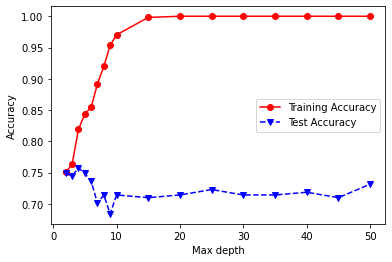

In [258]:
# Decision Tree analysis with the depth

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc[index] = accuracy_score(y1_train, y_predTrain)
    testAcc[index] = accuracy_score(y1_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index], 
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")
    index += 1

    
#########################################
# Plot of training and test accuracies
#########################################
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [259]:
# create a model 
dt5 = DecisionTreeClassifier(max_depth = 2, random_state=1)
dt5.fit(X1_train, y1_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [260]:
Y_predt1=dt5.predict(X1_test)

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
ac_dt2=accuracy_score(y1_test,Y_predt1)

In [263]:
ac_dt2

0.7489177489177489

# KNN

In [264]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [265]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier()

In [266]:
Y_pred_knn=knn.predict(X1_test)

In [267]:
ac_knn1=accuracy_score(y1_test,Y_pred_knn)

In [268]:
ac_knn1

0.7532467532467533

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.645021645021645 , Difference =  35.497835497835496 %
K =  5 , Training Accuracy =  0.8175046554934823  Test Accuracy =  0.7532467532467533 , Difference =  6.4257902246729 %
K =  10 , Training Accuracy =  0.7728119180633147  Test Accuracy =  0.70995670995671 , Difference =  6.285520810660472 %
K =  15 , Training Accuracy =  0.7728119180633147  Test Accuracy =  0.7272727272727273 , Difference =  4.553919079058744 %
K =  20 , Training Accuracy =  0.7430167597765364  Test Accuracy =  0.7316017316017316 , Difference =  1.1415028174804775 %
K =  25 , Training Accuracy =  0.7430167597765364  Test Accuracy =  0.7445887445887446 , Difference =  0.15719848122082158 %
K =  30 , Training Accuracy =  0.7392923649906891  Test Accuracy =  0.7359307359307359 , Difference =  0.3361629059953186 %
K =  60 , Training Accuracy =  0.7225325884543762  Test Accuracy =  0.7186147186147186 , Difference =  0.3917869839657584 %
K =  100 , Training Accuracy =  

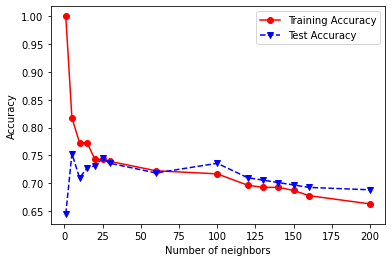

In [269]:
# KNN with Euclidean Distance Metric

from sklearn.neighbors import KNeighborsClassifier
numNeighbors = [1, 5, 10, 15, 20, 25, 30,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.70995670995671 , Difference =  29.004329004328998 %
K =  5 , Training Accuracy =  0.8119180633147114  Test Accuracy =  0.7402597402597403 , Difference =  7.16583230549711 %
K =  10 , Training Accuracy =  0.7728119180633147  Test Accuracy =  0.7316017316017316 , Difference =  4.121018646158314 %
K =  15 , Training Accuracy =  0.7616387337057728  Test Accuracy =  0.70995670995671 , Difference =  5.168202374906283 %
K =  20 , Training Accuracy =  0.7541899441340782  Test Accuracy =  0.7272727272727273 , Difference =  2.6917216861350957 %
K =  25 , Training Accuracy =  0.750465549348231  Test Accuracy =  0.7402597402597403 , Difference =  1.020580908849067 %
K =  30 , Training Accuracy =  0.7616387337057728  Test Accuracy =  0.7316017316017316 , Difference =  3.0037002104041255 %
K =  40 , Training Accuracy =  0.7486033519553073  Test Accuracy =  0.7229437229437229 , Difference =  2.565962901158436 %
K =  50 , Training Accuracy =  0.743

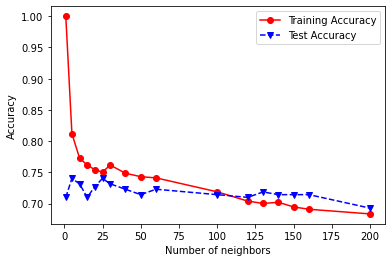

In [270]:
# KNN with Manhatten Distance Metric
numNeighbors = [1, 5, 10, 15, 20, 25, 30,40,50,60,100,120,130,140,150,160,200]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X1_train, y1_train)
    y_predTrain = clf.predict(X1_train)
    y_predTest = clf.predict(X1_test)
    trainAcc.append(accuracy_score(y1_train, y_predTrain))
    testAcc.append(accuracy_score(y1_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [271]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(penalty = 'none')

lr2.fit(X1_train, y1_train)
y_pred_train = lr2.predict(X1_train)
y_pred_test = lr2.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()
ac_lr1 = accuracy_score(y_pred_test, y1_test)

lr3 = LogisticRegression(penalty = 'l2')

lr3.fit(X1_train, y1_train)
y_pred_train = lr3.predict(X1_train)
y_pred_test = lr3.predict(X1_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Logistic Regression with no regularization
Train Accuracy:  0.776536312849162
Test Accuracy:  0.7705627705627706

Logistic Regression with L2 regularization
Train Accuracy:  0.7672253258845437
Test Accuracy:  0.7662337662337663


In [272]:
ac_lr1

0.7705627705627706

# Random Forest

In [273]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [274]:
rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [275]:
Y_pred_rf=rf.predict(X1_test)

In [276]:
ac_rf1=accuracy_score(y1_test,Y_pred_rf)

In [277]:
ac_rf1

0.7965367965367965

In [278]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.6405959031657356
Test Accuracy:  0.7359307359307359


In [279]:
ac_perceptron1 = accuracy_score(y_pred_test, y1_test)

In [280]:
ac_perceptron1

0.7359307359307359

In [281]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))

Train Accuracy:  0.6517690875232774
Test Accuracy:  0.6493506493506493


In [282]:
ac_naive1 = accuracy_score(y_pred_test, y1_test)

In [283]:
ac_naive1

0.6493506493506493

In [284]:
from sklearn.svm import SVC
clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X1_train, y1_train)
y_pred_train = clf.predict(X1_train)
y_pred_test = clf.predict(X1_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))


Train Accuracy:  0.7728119180633147
Test Accuracy:  0.7748917748917749


In [285]:
# for the SVC classifier
from sklearn import metrics
print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y1_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y1_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[136  14]
 [ 38  43]]

Classification Report
              precision    recall  f1-score   support

           0      0.782     0.907     0.840       150
           1      0.754     0.531     0.623        81

    accuracy                          0.775       231
   macro avg      0.768     0.719     0.731       231
weighted avg      0.772     0.775     0.764       231



In [286]:
ac_svc1 = accuracy_score(y_pred_test, y1_test)

In [287]:
ac_svc1

0.7748917748917749

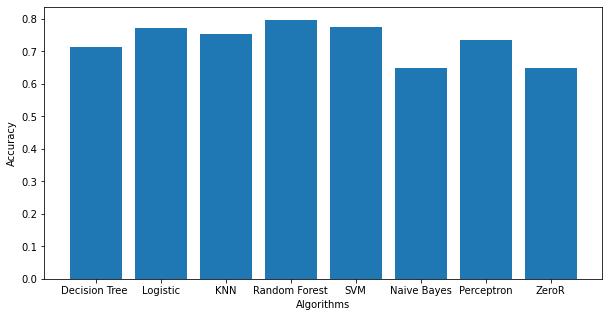

In [290]:
plt.figure(figsize = (10,5))
plt.bar(['Decision Tree ','Logistic','KNN','Random Forest','SVM','Naive Bayes','Perceptron','ZeroR'],[ac_dt4,ac_lr1,ac_knn1,ac_rf1,ac_svc1,ac_naive1,ac_perceptron1,ac_zero2])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Hyper Parameter Optimization

# DT HPT

In [292]:
#Manual

In [293]:
dt=DecisionTreeClassifier(max_depth=2,criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10)

In [294]:
prediction=dt.predict(X1_test)
accuracy_dt=accuracy_score(y1_test,prediction)*100
accuracy_dt

74.89177489177489

In [295]:
print("Accuracy on training set: {:.3f}".format(dt.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X1_test, y1_test)))

Accuracy on training set: 0.750
Accuracy on test set: 0.749


In [296]:
accuracy_score(prediction,y1_test)

0.7489177489177489

In [297]:
#now let's try to do hyperparameter

In [298]:
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [299]:
#let's try with Randomized Search Cv

In [300]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
splitter = ["best", "random"]
# Create the random grid
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [301]:
rf=DecisionTreeClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [302]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

In [303]:
rf_randomcv.best_estimator_

DecisionTreeClassifier(max_depth=1000, max_features='log2', min_samples_leaf=8)

In [304]:
best_random_grid=rf_randomcv.best_estimator_

In [305]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))


Accuracy Score 0.5800865800865801


In [306]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [307]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[126  24]
 [ 42  39]]
0.7142857142857143
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       150
           1       0.62      0.48      0.54        81

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.67       231
weighted avg       0.70      0.71      0.70       231



In [308]:
#GridSearch CV 

In [309]:
rf_randomcv.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 1000,
 'criterion': 'gini'}

In [310]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] + 2,
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 3,
                          rf_randomcv.best_params_['min_samples_split'] + 4],
    'splitter': [rf_randomcv.best_params_['splitter']]}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [1000], 'max_features': ['log2'], 'min_samples_leaf': [8, 10, 12], 'min_samples_split': [4, 3, 2, 5, 6], 'splitter': ['best']}


In [311]:
rf2=DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=rf2,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [1000],
                         'max_features': ['log2'],
                         'min_samples_leaf': [8, 10, 12],
                         'min_samples_split': [4, 3, 2, 5, 6],
                         'splitter': ['best']},
             verbose=2)

In [312]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=1000, max_features='log2', min_samples_leaf=8,
                       min_samples_split=4)

In [313]:
best_grid=grid_search.best_estimator_

In [314]:
best_grid

DecisionTreeClassifier(max_depth=1000, max_features='log2', min_samples_leaf=8,
                       min_samples_split=4)

In [315]:
y_pred=best_grid.predict(X1_test)
print(confusion_matrix(y1_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))
print("Classification report: {}".format(classification_report(y1_test,y_pred)))

[[130  20]
 [ 32  49]]
Accuracy Score 0.7748917748917749
Classification report:               precision    recall  f1-score   support

           0       0.80      0.87      0.83       150
           1       0.71      0.60      0.65        81

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



# KNN HPT

In [316]:
#Manual

In [317]:
knn=KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=1)
knn.fit(X1_train,y1_train)

KNeighborsClassifier(n_neighbors=20, p=1)

In [318]:
pred1=knn.predict(X1_test)
accuracy_knn=accuracy_score(y1_test,pred1)*100
accuracy_knn

72.72727272727273

In [319]:
print("Accuracy on training set: {:.3f}".format(knn.score(X1_train, y1_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X1_test, y1_test)))

Accuracy on training set: 0.754
Accuracy on test set: 0.727


In [320]:
accuracy_score(pred1,y1_test)

0.7272727272727273

In [321]:
#now let's try to do hyperparameter

In [322]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [323]:
#let's try with Randomized Search Cv

In [324]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = range(1, 200)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Create the random grid
random_grid1 = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric
               }
print(random_grid1)

{'n_neighbors': range(1, 200), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}


In [325]:
rf3=KNeighborsClassifier()
rf3_randomcv=RandomizedSearchCV(estimator=rf3,param_distributions=random_grid1,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf3_randomcv.fit(X1_train,y1_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': range(1, 200),
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [326]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 48, 'metric': 'manhattan'}

In [327]:
rf3_randomcv.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=48, weights='distance')

In [328]:
best_random_grid1=rf3_randomcv.best_estimator_

In [329]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid1.predict(X1_test)

print("Accuracy Score {}".format(accuracy_score(y1_test,y_pred)))


Accuracy Score 0.7229437229437229


In [330]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [331]:
print(confusion_matrix(y1_test,y_pred))
print(accuracy_score(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[139  11]
 [ 53  28]]
0.7229437229437229
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       150
           1       0.72      0.35      0.47        81

    accuracy                           0.72       231
   macro avg       0.72      0.64      0.64       231
weighted avg       0.72      0.72      0.69       231



In [332]:
#GridSearch CV 

In [333]:
rf3_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 48, 'metric': 'manhattan'}

In [334]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'weights': [rf3_randomcv.best_params_['weights']],
    
    'n_neighbors': [rf3_randomcv.best_params_['n_neighbors'], 
                         rf3_randomcv.best_params_['n_neighbors']+2, 
                         rf3_randomcv.best_params_['n_neighbors'] + 4,
                   rf3_randomcv.best_params_['n_neighbors']-2, 
                         rf3_randomcv.best_params_['n_neighbors'] - 4],
    'metric': [rf3_randomcv.best_params_['metric']]}

print(param_grid)

{'weights': ['distance'], 'n_neighbors': [48, 50, 52, 46, 44], 'metric': ['manhattan']}


In [335]:
rf4=KNeighborsClassifier()
grid_search=GridSearchCV(estimator=rf4,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X1_train,y1_train)


Fitting 10 folds for each of 5 candidates, totalling 50 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [48, 50, 52, 46, 44],
                         'weights': ['distance']},
             verbose=2)

In [336]:
grid_search.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')

In [337]:
best_grid1=grid_search.best_estimator_

In [338]:
best_grid1

KNeighborsClassifier(metric='manhattan', n_neighbors=50, weights='distance')

In [339]:
y_pred4=best_grid1.predict(X1_test)
print(confusion_matrix(y_test,y_pred4))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred4)))
print("Classification report: {}".format(classification_report(y_test,y_pred4)))

[[129  28]
 [ 61  13]]
Accuracy Score 0.6147186147186147
Classification report:               precision    recall  f1-score   support

           0       0.68      0.82      0.74       157
           1       0.32      0.18      0.23        74

    accuracy                           0.61       231
   macro avg       0.50      0.50      0.48       231
weighted avg       0.56      0.61      0.58       231



# Logistic regression

In [340]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf6 = LogisticRegression(penalty = 'none')

clf6.fit(X1_train, y1_train)
y_pred_train = clf6.predict(X1_train)
y_pred_test = clf6.predict(X1_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y1_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y1_test))
print()



Logistic Regression with no regularization
Train Accuracy:  0.776536312849162
Test Accuracy:  0.7705627705627706



In [341]:
clf6.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [342]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X1_train, y1_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.759143 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759143 (0.046071) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.759143 (0.046071) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.759143 (0.046071) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.758526 (0.045393) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.758526 (0.045393) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.757291 (0.046599) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.757326 (0.049073) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.757326 (0.049073) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.753645 (0.050087) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.717645 (0.041908) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.717645 (0.041908) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.672339 (0.029510) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.651817 (0.005604) wit

In [343]:
grid_y_predicted = grid_result.predict(X1_test)

In [344]:
grid_y_predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

In [345]:
logis_grid_score=accuracy_score(y1_test, grid_y_predicted)

In [346]:
logis_grid_score

0.7705627705627706

In [347]:
confusion_matrix(y1_test, grid_y_predicted)

array([[133,  17],
       [ 36,  45]], dtype=int64)

In [348]:
print(classification_report(y1_test,grid_y_predicted))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



Accuracy did not improve much after hyper parameter tuning 